# Data Cleaning - Airdna Data
by Zahratu Shabrina

In this notebook, we are looking to explore Airbnb data in Bandung and Jakarta, Indonesia. The data was collected through Airdna and contains the listings information from 2016 to 2020. The data was obtained through a grant, led by Adiwan F. Aritenang, ST., M.GIT., Ph.D.

There are two dataset for each city:
1. Monthly match (longitudinal data containing all the listings within the given timeframe, scrapped monthly)
2. Property Extended match (cross-sectional data of the property available in Airbnb by the time of the data collection)

In [1]:
# Import the necessary libraries

import matplotlib as mpl
# Make sure output is into notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import datetime as dt
import os
import seaborn; seaborn.set()
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from datetime import datetime

# ignore warnings message presence
import warnings
warnings.simplefilter('ignore')

In [2]:
!pwd

/Users/k1929112/Library/CloudStorage/OneDrive-King'sCollegeLondon/ITB Project


# Cross-sectional Data

## Bandung Airbnb Data

In [3]:
# Read the Airbnb listings data based on the cross-sectional (cs) data
airbnb_bdg_cs = pd.read_csv(os.path.join('Updated data 2020','Indonesia-bandung_Property_Extended_Match_2020-07-20.csv'))
airbnb_bdg_cs.head()

Property ID                                      Listing Title  \
0   ab-181481  A place amongst green pines at Bandung Cipaku ...   
1   ab-548934                apartmen bandung westjava indonesia   
2   ab-736264  Lamping GuestHouse Bandung - all 5 room for 10...   
3   ab-901887                        Chez Bon Backpackers Hostel   
4   ab-917306                        Chez Bon Backpackers Room 3   

         Property Type     Listing Type Created Date Last Scraped Date  \
0                House  Entire home/apt   2011-07-24        2020-07-19   
1            Apartment     Private room   2012-06-20        2017-05-04   
2                House  Entire home/apt   2012-10-11        2020-07-19   
3  Bed &amp; Breakfast      Shared room   2013-01-22        2016-05-07   
4      Bed & Breakfast      Shared room   2013-02-01        2017-09-29   

     Country      State     City  Zipcode  ...  Integrated Property Manager  \
0  Indonesia  West Java  Bandung      NaN  ...                          NaN   
1  Indonesia  West Java  Bandung      NaN  ...                          NaN   
2  Indonesia  West Java  Bandung      NaN  ...                          NaN   
3  Indonesia  West Java  Bandung      NaN  ...                          NaN   
4  Indonesia  West Java  Bandung      NaN  ...                          NaN   

                                           Amenities HomeAway Location Type  \
0  ["wireless_internet", "kitchen", "free_parking...                    NaN   
1              ["family_friendly", "event_friendly"]                    NaN   
2  ["wireless_internet", "kitchen", "free_parking...                    NaN   
3  ["kitchen", "tv", "ac", "washer", "dryer", "wi...                    NaN   
4  ["wireless_internet", "family_friendly", "kitc...                    NaN   

   Airbnb Property Plus  Airbnb Home Collection  License  Airbnb Property ID  \
0                   NaN                     NaN      NaN            181481.0   
1                   NaN                     NaN      NaN            548934.0   
2                   NaN                     NaN      NaN            736264.0   
3                   NaN                     NaN      NaN            901887.0   
4                   NaN                     NaN      NaN            917306.0   

   Airbnb Host ID  HomeAway Property ID  HomeAway Property Manager ID  
0        869350.0                   NaN                           NaN  
1       2692326.0                   NaN                           NaN  
2       3484918.0                   NaN                           NaN  
3       4818464.0                   NaN                           NaN  
4       4818464.0                   NaN                           NaN  

[5 rows x 70 columns]

In [4]:
airbnb_bdg_cs.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count 

In [5]:
# Checking the shape of the dataframe
airbnb_bdg_cs.shape

(5057, 70)

In [6]:
airbnb_bdg_cs.describe()

Zipcode  Neighborhood  Metropolitan Statistical Area  \
count      0.0           0.0                            0.0   
mean       NaN           NaN                            NaN   
std        NaN           NaN                            NaN   
min        NaN           NaN                            NaN   
25%        NaN           NaN                            NaN   
50%        NaN           NaN                            NaN   
75%        NaN           NaN                            NaN   
max        NaN           NaN                            NaN   

       Average Daily Rate (USD)  Average Daily Rate (Native)  \
count               2501.000000                 2.484000e+03   
mean                  42.903427                 5.532023e+05   
std                   47.172710                 6.551950e+05   
min                    9.000000                 1.000000e+01   
25%                   20.970000                 2.700000e+05   
50%                   28.500000                 3.858815e+05   
75%                   43.000000                 5.715470e+05   
max                  661.750000                 9.300000e+06   

       Annual Revenue LTM (USD)  Annual Revenue LTM (Native)  \
count               5045.000000                 4.738000e+03   
mean                 859.857483                 1.204744e+07   
std                 2833.080162                 4.092223e+07   
min                    0.000000                 0.000000e+00   
25%                    0.000000                 0.000000e+00   
50%                    0.000000                 1.196000e+03   
75%                  684.000000                 9.083829e+06   
max                78270.000000                 1.141250e+09   

       Occupancy Rate LTM  Number of Bookings LTM  Number of Reviews  ...  \
count         2501.000000             5045.000000        5043.000000  ...   
mean             0.291182                7.272547           6.534008  ...   
std              0.233266               16.666019          20.215042  ...   
min              0.032000                0.000000           0.000000  ...   
25%              0.107000                0.000000           0.000000  ...   
50%              0.230000                0.000000           0.000000  ...   
75%              0.411000                6.000000           3.000000  ...   
max              1.000000              149.000000         287.000000  ...   

       Airbnb Accuracy Rating  Airbnb Cleanliness Rating  \
count             2049.000000                2052.000000   
mean                 9.083455                   8.670078   
std                  1.520165                   1.659399   
min                  2.000000                   2.000000   
25%                  9.000000                   8.000000   
50%                 10.000000                   9.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Airbnb Checkin Rating  Airbnb Location Rating  Airbnb Value Rating  \
count            2047.000000             2049.000000          2047.000000   
mean                9.401563                9.339190             8.964827   
std                 1.309398                1.143354             1.504225   
min                 2.000000                2.000000             2.000000   
25%                 9.000000                9.000000             9.000000   
50%                10.000000               10.000000             9.000000   
75%                10.000000               10.000000            10.000000   
max                10.000000               10.000000            10.000000   

       Airbnb Property Plus  Airbnb Home Collection  License  \
count                   0.0                     0.0      0.0   
mean                    NaN                     NaN      NaN   
std                     NaN                     NaN      NaN   
min                     NaN                     NaN      NaN   
25%                     NaN         

In [7]:
# Let's check how many data has at least one review as a proxy for active Airbnb listings
airbnb_bdg_csactive=airbnb_bdg_cs.loc[(airbnb_bdg_cs['Number of Reviews']>5)] #We can see that only 2183 data are active listings
airbnb_bdg_csactive.shape

(919, 70)

In [8]:
airbnb_bdg_csactive.describe()

Zipcode  Neighborhood  Metropolitan Statistical Area  \
count      0.0           0.0                            0.0   
mean       NaN           NaN                            NaN   
std        NaN           NaN                            NaN   
min        NaN           NaN                            NaN   
25%        NaN           NaN                            NaN   
50%        NaN           NaN                            NaN   
75%        NaN           NaN                            NaN   
max        NaN           NaN                            NaN   

       Average Daily Rate (USD)  Average Daily Rate (Native)  \
count                783.000000                 7.830000e+02   
mean                  42.679157                 5.688460e+05   
std                   41.535019                 6.047758e+05   
min                   10.000000                 1.000000e+01   
25%                   21.615000                 2.922580e+05   
50%                   29.030000                 4.000000e+05   
75%                   44.985000                 6.124395e+05   
max                  403.450000                 5.882730e+06   

       Annual Revenue LTM (USD)  Annual Revenue LTM (Native)  \
count                919.000000                 9.190000e+02   
mean                2969.330794                 4.016871e+07   
std                 5343.845475                 7.637957e+07   
min                    0.000000                 0.000000e+00   
25%                  509.000000                 3.550000e+06   
50%                 1639.000000                 2.162500e+07   
75%                 3311.500000                 4.615167e+07   
max                78270.000000                 1.141250e+09   

       Occupancy Rate LTM  Number of Bookings LTM  Number of Reviews  ...  \
count          783.000000              919.000000         919.000000  ...   
mean             0.387936               26.984766          33.128400  ...   
std              0.211302               28.140400          37.051322  ...   
min              0.032000                0.000000           6.000000  ...   
25%              0.230500                3.000000          10.000000  ...   
50%              0.359000               19.000000          19.000000  ...   
75%              0.514500               42.500000          42.500000  ...   
max              1.000000              149.000000         287.000000  ...   

       Airbnb Accuracy Rating  Airbnb Cleanliness Rating  \
count              919.000000                 919.000000   
mean                 9.482046                   9.092492   
std                  0.707456                   0.833097   
min                  5.000000                   5.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                   9.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Airbnb Checkin Rating  Airbnb Location Rating  Airbnb Value Rating  \
count             919.000000              919.000000           919.000000   
mean                9.721436                9.582155             9.368879   
std                 0.541007                0.606382             0.693849   
min                 6.000000                6.000000             5.000000   
25%                10.000000                9.000000             9.000000   
50%                10.000000               10.000000             9.000000   
75%                10.000000               10.000000            10.000000   
max                10.000000               10.000000            10.000000   

       Airbnb Property Plus  Airbnb Home Collection  License  \
count                   0.0                     0.0      0.0   
mean                    NaN                     NaN      NaN   
std                     NaN                     NaN      NaN   
min                     NaN                     NaN      NaN   
25%                     NaN         

<AxesSubplot:>

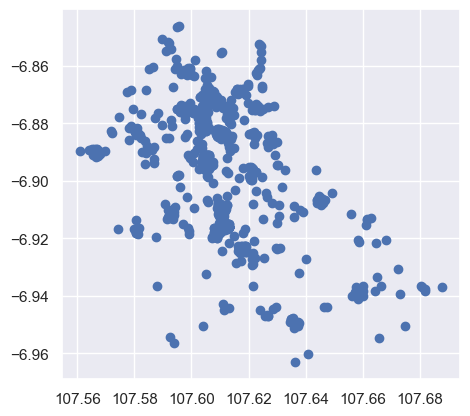

In [9]:
# Turn it into geodataframe using information of latitude and longitude
airbnb_bdg_csactive = gpd.GeoDataFrame(airbnb_bdg_csactive,crs=(4326), geometry=gpd.points_from_xy(airbnb_bdg_csactive.Longitude, airbnb_bdg_csactive.Latitude))
airbnb_bdg_csactive.plot()

## Jakarta Airbnb Data

In [10]:
# Read the Airbnb listings data based on the cross-sectional (cs) data
airbnb_jkt_cs = pd.read_csv(os.path.join('Updated data 2020','Indonesia-jakarta_Property_Extended_Match_2020-07-20.csv'))
airbnb_jkt_cs.head()

Property ID                                      Listing Title  \
0  ab-25459578                                    Pomelotel Hotel   
1  ab-25459661             CoHaus 3BR High Rise Apt Permata Hijau   
2  ab-25459981                                      A&R Residence   
3  ab-25460098  Cosy home w/ pool & very fast wifi near Taman ...   
4  ab-25460376            Gorgeous room for rent in A&R Residence   

        Property Type     Listing Type Created Date Last Scraped Date  \
0           Apartment  Entire home/apt   2018-06-09        2018-07-22   
1           Apartment  Entire home/apt   2018-06-09        2019-12-30   
2         Condominium  Entire home/apt   2019-01-21        2020-07-19   
3          Guesthouse  Entire home/apt   2018-06-09        2020-07-19   
4  Room in aparthotel     Private room   2019-01-21        2020-07-19   

     Country State     City  Zipcode  ...  Integrated Property Manager  \
0  Indonesia   NaN  Jakarta      NaN  ...                          NaN   
1  Indonesia   NaN  Jakarta      NaN  ...                          NaN   
2  Indonesia   NaN  Jakarta      NaN  ...                          NaN   
3  Indonesia   NaN  Jakarta      NaN  ...                          NaN   
4  Indonesia   NaN  Jakarta      NaN  ...                          NaN   

                                           Amenities HomeAway Location Type  \
0  ["wireless_internet", "kitchen", "elevator", "...                    NaN   
1  ["wireless_internet", "kitchen", "dryer", "ele...                    NaN   
2  ["wireless_internet", "kitchen", "dryer", "ele...                    NaN   
3  ["wireless_internet", "kitchen", "free_parking...                    NaN   
4  ["wireless_internet", "kitchen", "dryer", "ele...                    NaN   

   Airbnb Property Plus  Airbnb Home Collection  License  Airbnb Property ID  \
0                   NaN                     NaN      NaN          25459578.0   
1                   NaN                     NaN      NaN          25459661.0   
2                   NaN                     NaN      NaN          25459981.0   
3                   NaN                     NaN      NaN          25460098.0   
4                   NaN                     NaN      NaN          25460376.0   

   Airbnb Host ID  HomeAway Property ID  HomeAway Property Manager ID  
0     192176605.0                   NaN                           NaN  
1     119699703.0               7148539             travelmob-810190w  
2      75560364.0                   NaN                           NaN  
3     129070773.0                   NaN                           NaN  
4      75560364.0                   NaN                           NaN  

[5 rows x 70 columns]

In [11]:
# Checking the shape of the dataframe
airbnb_jkt_cs.shape

(20239, 70)

In [12]:
# Descriptive statistic of the data frame
airbnb_jkt_cs.describe()

Zipcode  Neighborhood  Metropolitan Statistical Area  \
count      0.0           0.0                            0.0   
mean       NaN           NaN                            NaN   
std        NaN           NaN                            NaN   
min        NaN           NaN                            NaN   
25%        NaN           NaN                            NaN   
50%        NaN           NaN                            NaN   
75%        NaN           NaN                            NaN   
max        NaN           NaN                            NaN   

       Average Daily Rate (USD)  Average Daily Rate (Native)  \
count               8453.000000                 8.360000e+03   
mean                  47.611501                 5.347585e+05   
std                   71.167687                 8.302710e+05   
min                    4.000000                 9.510000e+00   
25%                   23.330000                 2.500000e+05   
50%                   33.210000                 4.001925e+05   
75%                   52.240000                 6.335762e+05   
max                 2500.000000                 3.000000e+07   

       Annual Revenue LTM (USD)  Annual Revenue LTM (Native)  \
count              20209.000000                 1.869000e+04   
mean                 667.787471                 8.084959e+06   
std                 1814.941970                 2.356814e+07   
min                    0.000000                 0.000000e+00   
25%                    0.000000                 0.000000e+00   
50%                    0.000000                 0.000000e+00   
75%                  490.000000                 4.943124e+06   
max                51686.000000                 7.436556e+08   

       Occupancy Rate LTM  Number of Bookings LTM  Number of Reviews  ...  \
count         8453.000000            20209.000000       20170.000000  ...   
mean             0.337386                4.421396           3.978285  ...   
std              0.264440               10.846540          13.876624  ...   
min              0.032000                0.000000           0.000000  ...   
25%              0.105000                0.000000           0.000000  ...   
50%              0.278000                0.000000           0.000000  ...   
75%              0.510000                3.000000           2.000000  ...   
max              1.000000              147.000000         369.000000  ...   

       Airbnb Accuracy Rating  Airbnb Cleanliness Rating  \
count             6954.000000                6964.000000   
mean                 9.130572                   8.855112   
std                  1.579999                   1.678993   
min                  2.000000                   2.000000   
25%                  9.000000                   8.000000   
50%                 10.000000                   9.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Airbnb Checkin Rating  Airbnb Location Rating  Airbnb Value Rating  \
count            6947.000000             6941.000000          6943.000000   
mean                9.326616                9.349950             9.001296   
std                 1.560098                1.268947             1.608059   
min                 2.000000                2.000000             2.000000   
25%                 9.000000                9.000000             9.000000   
50%                10.000000               10.000000            10.000000   
75%                10.000000               10.000000            10.000000   
max                10.000000               10.000000            10.000000   

       Airbnb Property Plus  Airbnb Home Collection  License  \
count                   0.0                     0.0      0.0   
mean                    NaN                     NaN      NaN   
std                     NaN                     NaN      NaN   
min                     NaN                     NaN      NaN   
25%                     NaN         

In [13]:
# Let's check how many data has at least one review as a proxy for active Airbnb listings
airbnb_jkt_csactive=airbnb_jkt_cs.loc[(airbnb_jkt_cs['Number of Reviews']>5)] #We can see that only 7523 data are active listings
airbnb_jkt_csactive

Property ID                                      Listing Title  \
1      ab-25459661             CoHaus 3BR High Rise Apt Permata Hijau   
3      ab-25460098  Cosy home w/ pool & very fast wifi near Taman ...   
8      ab-25463646  Casa Grande residence - Kota Kasablanka Mall T...   
16     ab-25474626  Gandaria Height Apt  connecting Gandaria City ...   
20     ab-25491929                            Chic Studio Apt at City   
...            ...                                                ...   
19042   ha-4573675            Marriott Executive Apartments Mayflower   
19047   ha-4574884                         Morrissey Hotel Residences   
19187   ha-4902014                 Havenwood Senopati - Near Kidzania   
19198   ha-4908656                     Fraser Place Setiabudi Jakarta   
19219   ha-4917194                           Citadines Rasuna Jakarta   

             Property Type     Listing Type Created Date Last Scraped Date  \
1                Apartment  Entire home/apt   2018-06-09        2019-12-30   
3               Guesthouse  Entire home/apt   2018-06-09        2020-07-19   
8                Apartment  Entire home/apt   2018-06-08        2019-04-05   
16               Apartment  Entire home/apt   2018-06-09        2019-10-17   
20               Apartment  Entire home/apt   2018-06-08        2020-07-19   
...                    ...              ...          ...               ...   
19042  Corporate Apartment  Entire home/apt          NaN        2020-06-22   
19047  Corporate Apartment  Entire home/apt          NaN        2020-06-23   
19187  Corporate Apartment  Entire home/apt          NaN        2020-06-22   
19198  Corporate Apartment  Entire home/apt          NaN        2020-05-25   
19219  Corporate Apartment  Entire home/apt          NaN        2020-06-26   

         Country State     City  Zipcode  ...  Integrated Property Manager  \
1      Indonesia   NaN  Jakarta      NaN  ...                          NaN   
3      Indonesia   NaN  Jakarta      NaN  ...                          NaN   
8      Indonesia   NaN  Jakarta      NaN  ...                          NaN   
16     Indonesia   NaN  Jakarta      NaN  ...                          NaN   
20     Indonesia   NaN  Jakarta      NaN  ...                          NaN   
...          ...   ...      ...      ...  ...                          ...   
19042  Indonesia   NaN  Jakarta      NaN  ...                         True   
19047  Indonesia   NaN  Jakarta      NaN  ...                         True   
19187  Indonesia   NaN  Jakarta      NaN  ...                         True   
19198  Indonesia   NaN  Jakarta      NaN  ...                         True   
19219  Indonesia   NaN  Jakarta      NaN  ...                         True   

                                               Amenities  \
1      ["wireless_internet", "kitchen", "dryer", "ele...   
3      ["wireless_internet", "kitchen", "free_parking...   
8      ["wireless_internet", "kitchen", "elevator", "...   
16     ["wireless_internet", "kitchen", "elevator", "...   
20     ["kitchen", "dryer", "elevator", "hair-dryer",...   
...                                                  ...   
19042  {"DINING": ["Dining Area", "Dining Room"], "GE...   
19047  {"GENERAL": ["Elevator", "Telephone", "Interne...   
19187  {"GENERAL": ["Telephone", "Internet", "Elevato...   
19198  {"DINING": ["Dining Area", "Dining Room"], "GE...   
19219  {"GENERAL": ["Safe", "Elevator", "Telephone", ...   

      HomeAway Location Type  Airbnb Property Plus  Airbnb Home Collection  \
1                        NaN                   NaN                     NaN   
3                        NaN                   NaN                     NaN   
8                        NaN                   NaN                     NaN   
16                       NaN                   NaN                     NaN   
20                       NaN                   NaN                     NaN   
...                      ...                   ...                 

In [14]:
# There are two outliers where Airbnb listings are located in the ocean! Let's remove!
airbnb_jkt_csactive = airbnb_jkt_csactive.loc[(airbnb_jkt_csactive['Latitude']<-6)]
airbnb_jkt_csactive.shape

(2770, 70)

<AxesSubplot:>

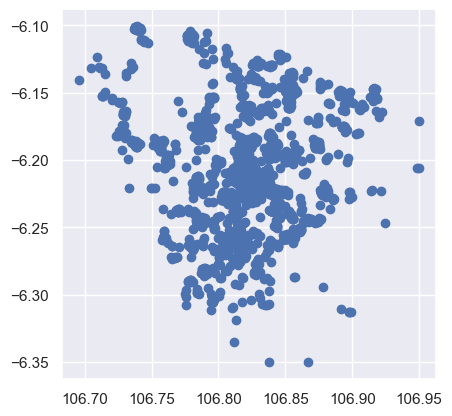

In [15]:
# Turn it into geodataframe using information of latitude and longitude
airbnb_jkt_csactive = gpd.GeoDataFrame(airbnb_jkt_csactive,crs=(4326), geometry=gpd.points_from_xy(airbnb_jkt_csactive.Longitude, airbnb_jkt_csactive.Latitude))
airbnb_jkt_csactive.plot()

In [16]:
airbnb_jkt_csactive.to_file("Airbnb_Jkt_Active.shp")

In [17]:
airbnb_bdg_csactive.to_file("Airbnb_Bdg_Active.shp")

## Reading in Spatial Data (Bandung and Jakarta)

In [18]:
# Read in Bandung spatial data (json file from Bandung open data)
bdg = gpd.read_file(os.path.join('Bandung_kelurahan.json'))
# Read in Jakarta Spatial data
jkt = gpd.read_file(os.path.join('dki_kelurahan','dki_kelurahan.shp'))
bdg

OBJECTID          swk  kode_kecamatan nama_kecamatan    nama_kelurahan  \
0           1  Ujungberung         3273111    Panyileukan       Mekar Mulya   
1           2  Ujungberung         3273111    Panyileukan    Cipadung Wetan   
2           3  Ujungberung         3273111    Panyileukan    Cipadung Kidul   
3           4  Ujungberung         3273120    Ujungberung       Pasir Endah   
4           5  Ujungberung         3273120    Ujungberung         Cigending   
..        ...          ...             ...            ...               ...   
146       147     Gedebage         3273101       Gedebage  Cisaranten Kidul   
147       148    Arcamanik         3273141       Antapani   Antapani Tengah   
148       149     Gedebage         3273100      Rancasari        Manjahlega   
149       150    Arcamanik         3273130      Arcamanik  Cisaranten Kulon   
150       151    Arcamanik         3273130      Arcamanik  Cisaranten Endah   

     shape_length    shape_area  \
0     5378.370410  1.541476e+06   
1     4236.950017  8.411177e+05   
2     5402.887752  1.523937e+06   
3     5123.466646  9.543637e+05   
4     4161.086917  8.920893e+05   
..            ...           ...   
146  11941.188868  6.773519e+06   
147   8248.194868  1.878189e+06   
148   4320.986849  6.344518e+05   
149   2027.537077  1.431960e+05   
150   4754.882345  9.418916e+05   

                                              geometry  
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...  
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...  
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...  
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...  
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...  
..                                                 ...  
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...  
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...  
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...  
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...  
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...  

[151 rows x 8 columns]

In [19]:
# Read in Jakarta Spatial data
jkt = gpd.read_file(os.path.join('dki_kelurahan','dki_kelurahan.shp'))

<AxesSubplot:>

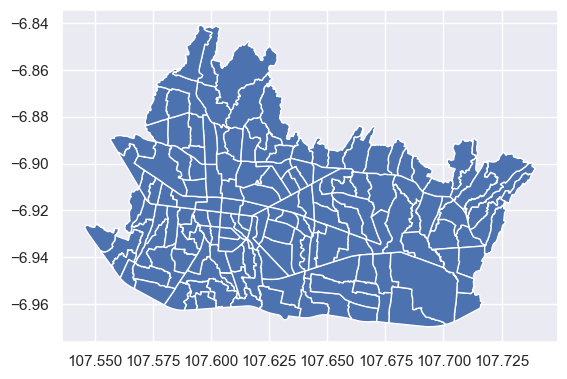

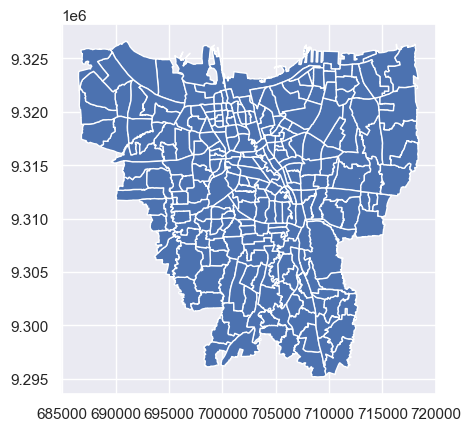

In [20]:
bdg.plot()
jkt.plot() # CRS for Jakarta needs adjusting

In [21]:
bdg

OBJECTID          swk  kode_kecamatan nama_kecamatan    nama_kelurahan  \
0           1  Ujungberung         3273111    Panyileukan       Mekar Mulya   
1           2  Ujungberung         3273111    Panyileukan    Cipadung Wetan   
2           3  Ujungberung         3273111    Panyileukan    Cipadung Kidul   
3           4  Ujungberung         3273120    Ujungberung       Pasir Endah   
4           5  Ujungberung         3273120    Ujungberung         Cigending   
..        ...          ...             ...            ...               ...   
146       147     Gedebage         3273101       Gedebage  Cisaranten Kidul   
147       148    Arcamanik         3273141       Antapani   Antapani Tengah   
148       149     Gedebage         3273100      Rancasari        Manjahlega   
149       150    Arcamanik         3273130      Arcamanik  Cisaranten Kulon   
150       151    Arcamanik         3273130      Arcamanik  Cisaranten Endah   

     shape_length    shape_area  \
0     5378.370410  1.541476e+06   
1     4236.950017  8.411177e+05   
2     5402.887752  1.523937e+06   
3     5123.466646  9.543637e+05   
4     4161.086917  8.920893e+05   
..            ...           ...   
146  11941.188868  6.773519e+06   
147   8248.194868  1.878189e+06   
148   4320.986849  6.344518e+05   
149   2027.537077  1.431960e+05   
150   4754.882345  9.418916e+05   

                                              geometry  
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...  
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...  
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...  
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...  
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...  
..                                                 ...  
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...  
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...  
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...  
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...  
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...  

[151 rows x 8 columns]

<AxesSubplot:>

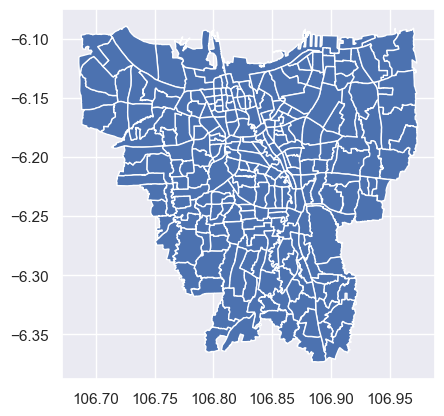

In [22]:
jkt = jkt.to_crs('epsg:4326')
jkt.plot()

## Exploratory Data Analysis of Airbnb in Bandung and Jakarta (Cross Sectional Data)

In [23]:
coord_jkt = airbnb_jkt_csactive.loc[:,['Longitude','Latitude']]
coord_bdg = airbnb_bdg_csactive.loc[:,['Longitude','Latitude']]

In [24]:
coord_jkt.describe()

Longitude     Latitude
count  2770.000000  2770.000000
mean    106.819548    -6.203797
std       0.036244     0.043908
min     106.695580    -6.350150
25%     106.792330    -6.227837
50%     106.818675    -6.205875
75%     106.842000    -6.178118
max     106.950230    -6.100380

In [25]:
coord_bdg.describe()

Longitude    Latitude
count  919.000000  919.000000
mean   107.608824   -6.893896
std      0.018500    0.021533
min    107.560920   -6.963039
25%    107.603505   -6.910085
50%    107.606000   -6.889000
75%    107.615420   -6.878240
max    107.687931   -6.846140

### Heatmap of cross-sectional Airbnb Data in Bandung and Jakarta

In [26]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([-6.203799,106.820737],zoom_start=11.4)
HeatMap(airbnb_jkt_csactive[['Latitude','Longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
folium.TileLayer('cartodbpositron').add_to(map_folium)
display(map_folium)
map_folium.save("jkt.html")

In [27]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([-6.897040,107.609888],zoom_start=11.4)
HeatMap(airbnb_bdg_csactive[['Latitude','Longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
folium.TileLayer('cartodbpositron').add_to(map_folium)
display(map_folium)
map_folium.save("bdg.html")

In [28]:
# Let's merge the cross-section data together for analysis purpose
airbnb_bdg_csactive['city']='Bandung'
airbnb_jkt_csactive['city']='Jakarta'
# merge together
listings_cs = pd.concat([airbnb_bdg_csactive, airbnb_jkt_csactive]).reset_index(drop = True)

In [29]:
# Check the structure of the data after it's loaded.
nrow = listings_cs.shape[0]
ncol = listings_cs.shape[1]
print('The number of rows and columns: {} x {} in Airbnb dataset'.format(nrow, ncol))
listings_cs.head(1)

The number of rows and columns: 3689 x 72 in Airbnb dataset


Property ID                                      Listing Title  \
0   ab-181481  A place amongst green pines at Bandung Cipaku ...   

  Property Type     Listing Type Created Date Last Scraped Date    Country  \
0         House  Entire home/apt   2011-07-24        2020-07-19  Indonesia   

       State     City  Zipcode  ...  HomeAway Location Type  \
0  West Java  Bandung      NaN  ...                     NaN   

   Airbnb Property Plus Airbnb Home Collection  License  Airbnb Property ID  \
0                   NaN                    NaN      NaN            181481.0   

   Airbnb Host ID  HomeAway Property ID  HomeAway Property Manager ID  \
0        869350.0                   NaN                           NaN   

                     geometry     city  
0  POINT (107.59634 -6.86293)  Bandung  

[1 rows x 72 columns]

In [30]:
# only keep the following features in the dataset
cols =['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)', 'Minimum Stay',
       'Count Reservation Days LTM', 'Count Available Days LTM',
       'Count Blocked Days LTM', 'Number of Photos', 'Instantbook Enabled', 'Latitude',
       'Longitude', 'Exact Location', 'Overall Rating', 'Amenities',
       'Airbnb Property ID', 'Airbnb Host ID']
cleaned_list = listings_cs[cols]

cleaned_list.head(2)

Property ID                                      Listing Title  \
0   ab-181481  A place amongst green pines at Bandung Cipaku ...   
1   ab-736264  Lamping GuestHouse Bandung - all 5 room for 10...   

  Property Type     Listing Type Created Date Last Scraped Date    Country  \
0         House  Entire home/apt   2011-07-24        2020-07-19  Indonesia   
1         House  Entire home/apt   2012-10-11        2020-07-19  Indonesia   

       State     City Currency Native  ...  Count Blocked Days LTM  \
0  West Java  Bandung             USD  ...                     8.0   
1  West Java  Bandung             IDR  ...                    43.0   

   Number of Photos  Instantbook Enabled  Latitude  Longitude  Exact Location  \
0              83.0                 True  -6.86293  107.59634           False   
1              29.0                 True  -6.88629  107.60188           False   

   Overall Rating                                          Amenities  \
0            98.0  ["wireless_internet", "kitchen", "free_parking...   
1            99.0  ["wireless_internet", "kitchen", "free_parking...   

   Airbnb Property ID  Airbnb Host ID  
0            181481.0        869350.0  
1            736264.0       3484918.0  

[2 rows x 48 columns]

HomeAway Premier Partner       0.976959
Security Deposit (Native)      0.789374
Security Deposit (USD)         0.786392
State                          0.750881
Extra People Fee (Native)      0.673895
Extra People Fee (USD)         0.665492
Cleaning Fee (Native)          0.583356
Cleaning Fee (USD)             0.474654
Average Daily Rate (Native)    0.200325
Occupancy Rate LTM             0.200054
dtype: float64

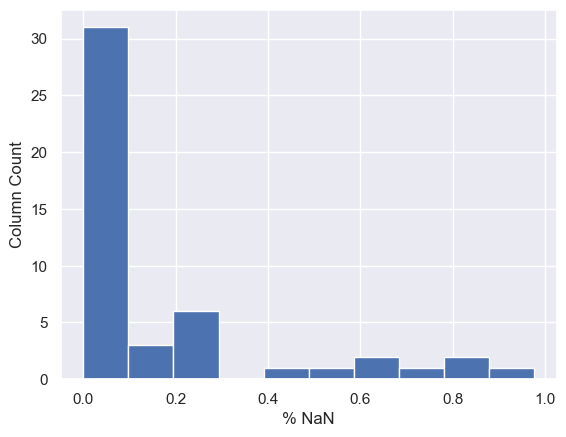

In [31]:
nan_cols = (cleaned_list.isnull().sum()/cleaned_list.shape[0]).sort_values(ascending = False)
ax = nan_cols.hist()  
ax.set_xlabel("% NaN")
ax.set_ylabel("Column Count")
nan_cols.head(n=10)

In [32]:
# drop high-NaN columns
cleaned_list = cleaned_list.drop(labels = ['Security Deposit (Native)', 'Security Deposit (USD)', 'HomeAway Premier Partner', 'Cleaning Fee (Native)','Cleaning Fee (USD)', \
                                           'Extra People Fee (Native)', 'Extra People Fee (USD)'], axis = 1)

### Spatial Join the Cross-Sectional Airbnb data
(1) Aggregate and count the number of Airbnb in each kelurahan \
(2) Count the sum of revenue, booking, etc. in each Kelurahan \

Let's count the number of Airbnb first

### JAKARTA

<AxesSubplot:>

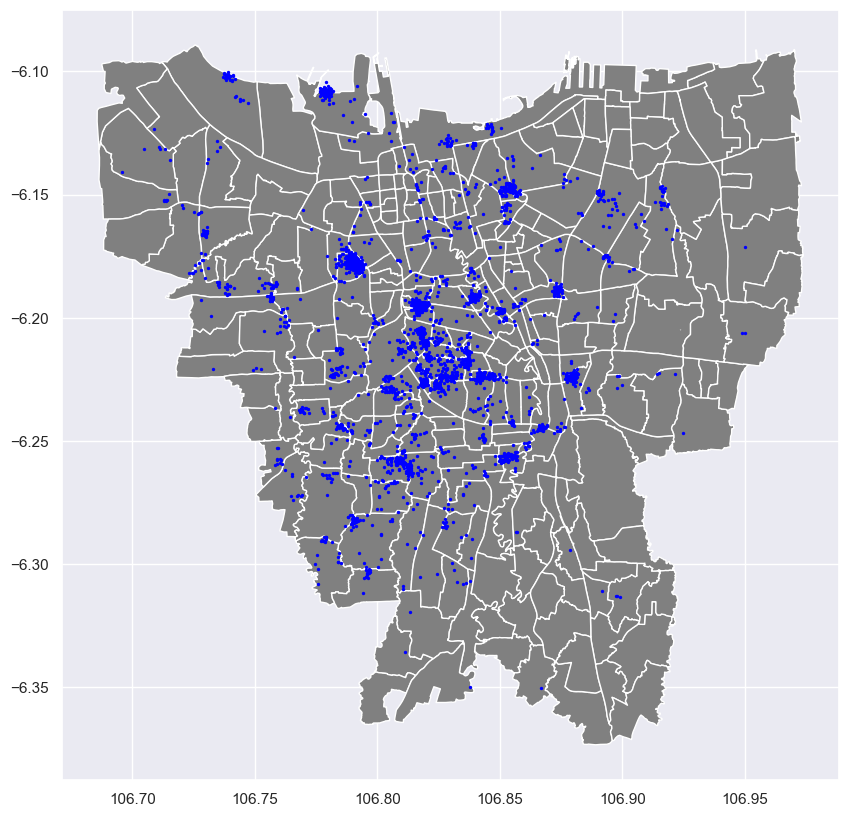

In [33]:
# Let's plot the Airbnb data in Jakarta
fig, ax = plt.subplots(figsize=(12,10))
jkt.plot(color="gray", ax= ax);
airbnb_jkt_csactive.plot(ax=ax, color='blue', markersize=2)

In [34]:
# Perform Spatial Join to join both spatial data
sjoined_jkt_listings = gpd.sjoin(airbnb_jkt_csactive, jkt, op="within")
sjoined_jkt_listings.head()

Property ID                                      Listing Title  \
1    ab-25459661             CoHaus 3BR High Rise Apt Permata Hijau   
560  ab-26512100  2BR Spacious Modern Apt @SOMERSET JAKARTA/SENAYAN   
748  ab-26889924              Lovely apartment with hotel amenities   
755  ab-26907975  Cozy Senayan Rooms near GBK Stadium and Big Malls   
786  ab-26995350                                      Rumah Platina   

    Property Type     Listing Type Created Date Last Scraped Date    Country  \
1       Apartment  Entire home/apt   2018-06-09        2019-12-30  Indonesia   
560     Apartment     Private room   2018-07-03        2020-01-31  Indonesia   
748   Condominium  Entire home/apt   2018-07-28        2019-10-10  Indonesia   
755     Townhouse  Entire home/apt   2018-07-28        2020-01-06  Indonesia   
786         House  Entire home/apt   2018-07-18        2020-07-18  Indonesia   

    State     City  Zipcode  ...  Airbnb Property ID  Airbnb Host ID  \
1     NaN  Jakarta      NaN  ...          25459661.0     119699703.0   
560   NaN  Jakarta      NaN  ...          26512100.0      62714461.0   
748   NaN  Jakarta      NaN  ...          26889924.0       2088874.0   
755   NaN  Jakarta      NaN  ...          26907975.0     202437862.0   
786   NaN  Jakarta      NaN  ...          26995350.0     203112274.0   

    HomeAway Property ID  HomeAway Property Manager ID  \
1                7148539             travelmob-810190w   
560                  NaN                           NaN   
748                  NaN                           NaN   
755                  NaN                           NaN   
786                  NaN                           NaN   

                       geometry     city  index_right      KEL_NAME  \
1    POINT (106.78453 -6.22014)  Jakarta           71  GROGOL UTARA   
560  POINT (106.78200 -6.22400)  Jakarta           71  GROGOL UTARA   
748  POINT (106.78214 -6.22327)  Jakarta           71  GROGOL UTARA   
755  POINT (106.79302 -6.21961)  Jakarta           71  GROGOL UTARA   
786  POINT (106.78749 -6.22012)  Jakarta           71  GROGOL UTARA   

          Kecamatan          ID  
1    KEBAYORAN LAMA  3171050006  
560  KEBAYORAN LAMA  3171050006  
748  KEBAYORAN LAMA  3171050006  
755  KEBAYORAN LAMA  3171050006  
786  KEBAYORAN LAMA  3171050006  

[5 rows x 76 columns]

In [35]:
sjoined_jkt_listings.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count 

In [36]:
# Let's count the number of Airbnb
# Group the listings that has the same KELURAHAN code information
grouped = sjoined_jkt_listings.groupby("KEL_NAME").size()
df_jkt = grouped.to_frame().reset_index()
df_jkt.columns = ['KEL_NAME', 'listings_count']
df_jkt

KEL_NAME  listings_count
0                ANCOL              34
1                ANGKE               2
2           BAMBU APUS               3
3               BANGKA              65
4           BATU AMPAR               2
..                 ...             ...
162       TEGAL PARANG               1
163             TOMANG               6
164            ULUJAMI               1
165  UTAN KAYU SELATAN               1
166      WIJAYA KESUMA               1

[167 rows x 2 columns]

In [37]:
jkt.head()

KEL_NAME    Kecamatan          ID  \
0         ANCOL   PADEMANGAN  3175020003   
1         ANGKE      TAMBORA  3174050007   
2  BALE KAMBANG  KRAMAT JATI  3172050001   
3   BALI MESTER   JATINEGARA  3172060007   
4    BAMBU APUS     CIPAYUNG  3172030006   

                                            geometry  
0  MULTIPOLYGON (((106.87774 -6.09487, 106.87773 ...  
1  POLYGON ((106.80061 -6.14291, 106.80072 -6.145...  
2  POLYGON ((106.85802 -6.26768, 106.85834 -6.267...  
3  POLYGON ((106.87024 -6.22461, 106.87025 -6.224...  
4  MULTIPOLYGON (((106.91782 -6.30255, 106.91782 ...

In [38]:
# Merge it back to Kelurahan data
airbnbcs_jkt = jkt.merge(df_jkt, on="KEL_NAME", how="outer")
# Change null values to zero
airbnbcs_jkt = airbnbcs_jkt.fillna(0)
airbnbcs_jkt

KEL_NAME          Kecamatan          ID  \
0                ANCOL         PADEMANGAN  3175020003   
1                ANGKE            TAMBORA  3174050007   
2         BALE KAMBANG        KRAMAT JATI  3172050001   
3          BALI MESTER         JATINEGARA  3172060007   
4           BAMBU APUS           CIPAYUNG  3172030006   
..                 ...                ...         ...   
257            WARAKAS      TANJUNG PRIOK  3175030004   
258      WIJAYA KESUMA  GROGOL PETAMBURAN  3174040006   
259              KAMAL          KALIDERES  3174080005   
260        SUNTER JAYA      TANJUNG PRIOK  3175030002   
261  RAWABADAK SELATAN               KOJA  3175040001   

                                              geometry  listings_count  
0    MULTIPOLYGON (((106.87774 -6.09487, 106.87773 ...            34.0  
1    POLYGON ((106.80061 -6.14291, 106.80072 -6.145...             2.0  
2    POLYGON ((106.85802 -6.26768, 106.85834 -6.267...             0.0  
3    POLYGON ((106.87024 -6.22461, 106.87025 -6.224...             0.0  
4    MULTIPOLYGON (((106.91782 -6.30255, 106.91782 ...             3.0  
..                                                 ...             ...  
257  POLYGON ((106.88315 -6.12464, 106.88316 -6.124...             0.0  
258  POLYGON ((106.78093 -6.15069, 106.78098 -6.150...             1.0  
259  POLYGON ((106.69456 -6.09564, 106.69576 -6.096...             0.0  
260  POLYGON ((106.88632 -6.14108, 106.88710 -6.141...             7.0  
261  POLYGON ((106.89595 -6.12349, 106.89715 -6.123...             0.0  

[262 rows x 5 columns]

Let's look at the other variables (especially booking and revenue total)

In [39]:
#Group the listings that has the same KELURAHAN code information
grouped = sjoined_jkt_listings.groupby("KEL_NAME").sum()
grouped

Zipcode  Neighborhood  Metropolitan Statistical Area  \
KEL_NAME                                                                  
ANCOL                  0.0           0.0                            0.0   
ANGKE                  0.0           0.0                            0.0   
BAMBU APUS             0.0           0.0                            0.0   
BANGKA                 0.0           0.0                            0.0   
BATU AMPAR             0.0           0.0                            0.0   
...                    ...           ...                            ...   
TEGAL PARANG           0.0           0.0                            0.0   
TOMANG                 0.0           0.0                            0.0   
ULUJAMI                0.0           0.0                            0.0   
UTAN KAYU SELATAN      0.0           0.0                            0.0   
WIJAYA KESUMA          0.0           0.0                            0.0   

                   Average Daily Rate (USD)  Average Daily Rate (Native)  \
KEL_NAME                                                                   
ANCOL                               1232.87                  12752183.07   
ANGKE                                 40.59                    586216.00   
BAMBU APUS                            31.94                    451313.00   
BANGKA                              3228.43                  37408611.99   
BATU AMPAR                            23.00                    320000.00   
...                                     ...                          ...   
TEGAL PARANG                          24.38                    363501.00   
TOMANG                               241.64                   3289482.00   
ULUJAMI                               18.22                    258764.00   
UTAN KAYU SELATAN                      0.00                         0.00   
WIJAYA KESUMA                         18.64                    264555.00   

                   Annual Revenue LTM (USD)  Annual Revenue LTM (Native)  \
KEL_NAME                                                                   
ANCOL                               99992.0                 1.050859e+09   
ANGKE                                2615.0                 3.784500e+07   
BAMBU APUS                           2214.0                 3.124000e+07   
BANGKA                             233188.0                 2.802584e+09   
BATU AMPAR                            225.0                 3.100000e+06   
...                                     ...                          ...   
TEGAL PARANG                         1414.0                 2.108306e+07   
TOMANG                              12867.0                 1.802647e+08   
ULUJAMI                               492.0                 6.986629e+06   
UTAN KAYU SELATAN                       0.0                 0.000000e+00   
WIJAYA KESUMA                         820.0                 1.164042e+07   

                   Occupancy Rate LTM  Number of Bookings LTM  \
KEL_NAME                                                        
ANCOL                           9.153                   790.0   
ANGKE                           0.830                    32.0   
BAMBU APUS                      0.579                    38.0   
BANGKA                         25.730                  1110.0   
BATU AMPAR                      0.582                     3.0   
...                               ...                     ...   
TEGAL PARANG                    0.537                    16.0   
TOMANG                          1.397                    78.0   
ULUJAMI                         0.142                    16.0   
UTAN KAYU SELATAN               0.000                     0.0   
WIJAYA KESUMA                   0.191                    27.0   

                   Number of Reviews  ...  Airbnb Cleanliness Rating  \
KEL_NAME                              ...                              
ANCOL                          909.0  ...                      309.0   
ANG

In [40]:
df_jkt = grouped.reset_index()
df_jkt

KEL_NAME  Zipcode  Neighborhood  Metropolitan Statistical Area  \
0                ANCOL      0.0           0.0                            0.0   
1                ANGKE      0.0           0.0                            0.0   
2           BAMBU APUS      0.0           0.0                            0.0   
3               BANGKA      0.0           0.0                            0.0   
4           BATU AMPAR      0.0           0.0                            0.0   
..                 ...      ...           ...                            ...   
162       TEGAL PARANG      0.0           0.0                            0.0   
163             TOMANG      0.0           0.0                            0.0   
164            ULUJAMI      0.0           0.0                            0.0   
165  UTAN KAYU SELATAN      0.0           0.0                            0.0   
166      WIJAYA KESUMA      0.0           0.0                            0.0   

     Average Daily Rate (USD)  Average Daily Rate (Native)  \
0                     1232.87                  12752183.07   
1                       40.59                    586216.00   
2                       31.94                    451313.00   
3                     3228.43                  37408611.99   
4                       23.00                    320000.00   
..                        ...                          ...   
162                     24.38                    363501.00   
163                    241.64                   3289482.00   
164                     18.22                    258764.00   
165                      0.00                         0.00   
166                     18.64                    264555.00   

     Annual Revenue LTM (USD)  Annual Revenue LTM (Native)  \
0                     99992.0                 1.050859e+09   
1                      2615.0                 3.784500e+07   
2                      2214.0                 3.124000e+07   
3                    233188.0                 2.802584e+09   
4                       225.0                 3.100000e+06   
..                        ...                          ...   
162                    1414.0                 2.108306e+07   
163                   12867.0                 1.802647e+08   
164                     492.0                 6.986629e+06   
165                       0.0                 0.000000e+00   
166                     820.0                 1.164042e+07   

     Occupancy Rate LTM  Number of Bookings LTM  ...  \
0                 9.153                   790.0  ...   
1                 0.830                    32.0  ...   
2                 0.579                    38.0  ...   
3                25.730                  1110.0  ...   
4                 0.582                     3.0  ...   
..                  ...                     ...  ...   
162               0.537                    16.0  ...   
163               1.397                    78.0  ...   
164               0.142                    16.0  ...   
165               0.000                     0.0  ...   
166               0.191                    27.0  ...   

     Airbnb Cleanliness Rating  Airbnb Checkin Rating  Airbnb Location Rating  \
0                        309.0                  323.0                   324.0   
1                         18.0                   19.0                    18.0   
2                         28.0                   30.0                    29.0   
3                        596.0                  633.0                   639.0   
4                         20.0                   20.0                    18.0   
..                         ...                    ...                     ...   
162                       10.0                   10.0                     9.0   
163                       56.0                   58.0                    56.0   
164                       10.0                   10.0                    10.0   
165                        8.0                    7.0                     8.0   

In [41]:
# Merge it back to Kelurahan data
airbnbrev_jkt = jkt.merge(df_jkt, on="KEL_NAME", how="outer")
# Change null values to zero
airbnbrev_jkt = airbnbrev_jkt.fillna(0)
airbnbrev_jkt.columns

Index(['KEL_NAME', 'Kecamatan', 'ID', 'geometry', 'Zipcode', 'Neighborhood',
       'Metropolitan Statistical Area', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Response Rate', 'Security Deposit (USD)',
       'Security Deposit (Native)', 'Cleaning Fee (USD)',
       'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Minimum Stay', 'Count Reservation Days LTM',
       'Count Available Days LTM', 'Count Blocked Days LTM',
       'Number of Photos', 'Instantbook Enabled', 'Latitude', 'Longitude',
       'Overall Rating', 'Airbnb Communication Rating',
       'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating',
       'Airbnb Checkin Ra

<AxesSubplot:>

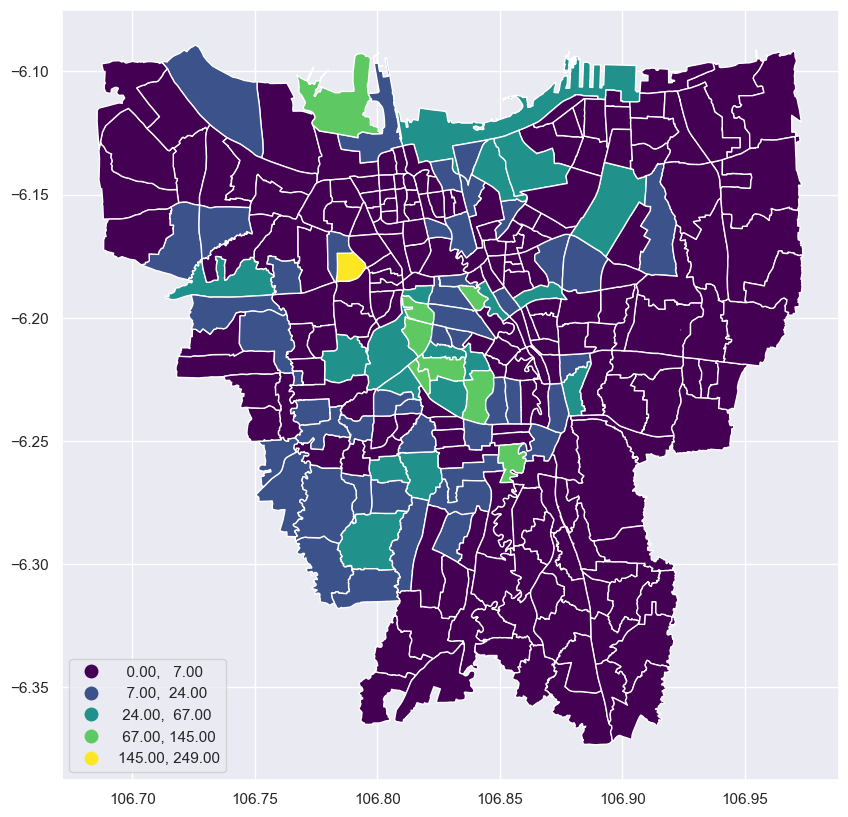

In [42]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbcs_jkt.plot(ax=ax, column="listings_count", scheme='fisherjenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<AxesSubplot:>

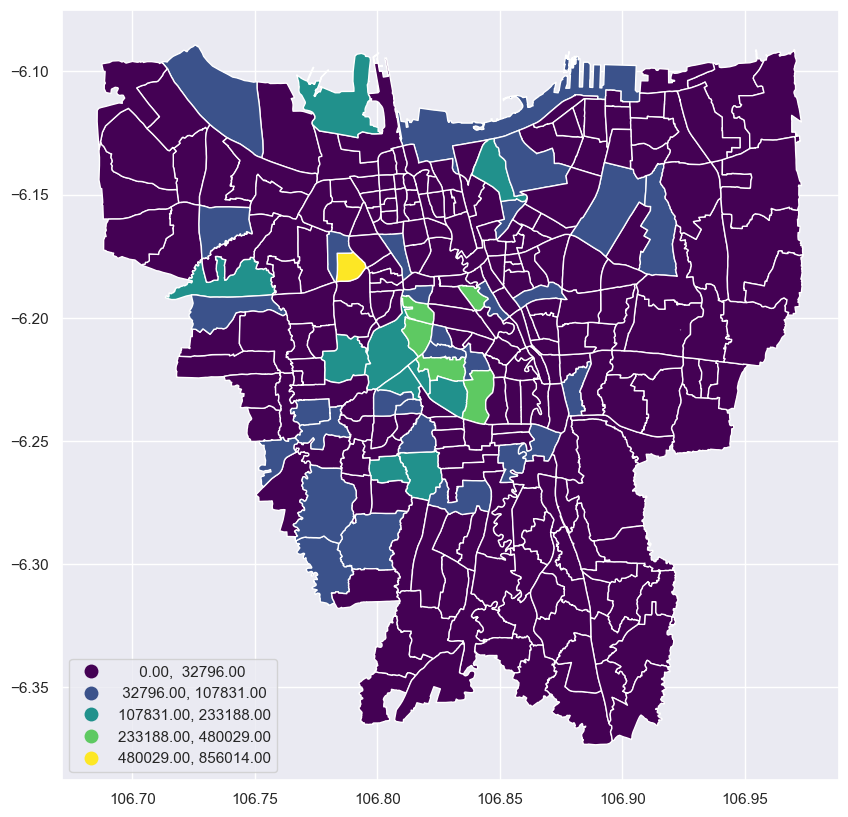

In [43]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbrev_jkt.plot(ax=ax, column="Annual Revenue LTM (USD)", scheme='fisherjenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<AxesSubplot:>

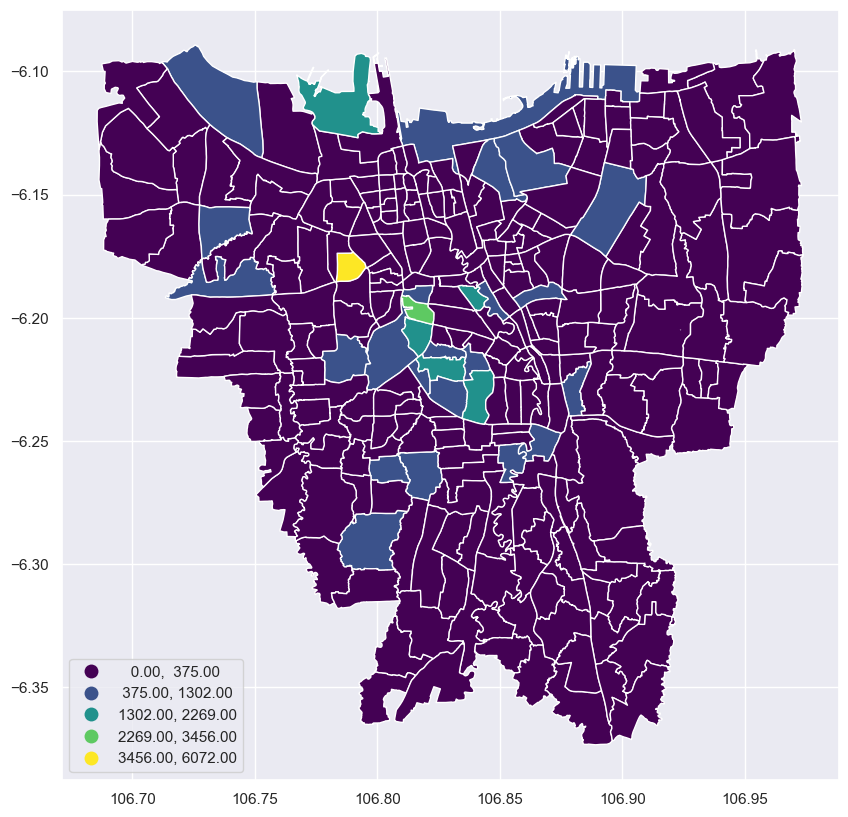

In [44]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbrev_jkt.plot(ax=ax, column="Number of Bookings LTM", scheme='fisherjenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

<AxesSubplot:>

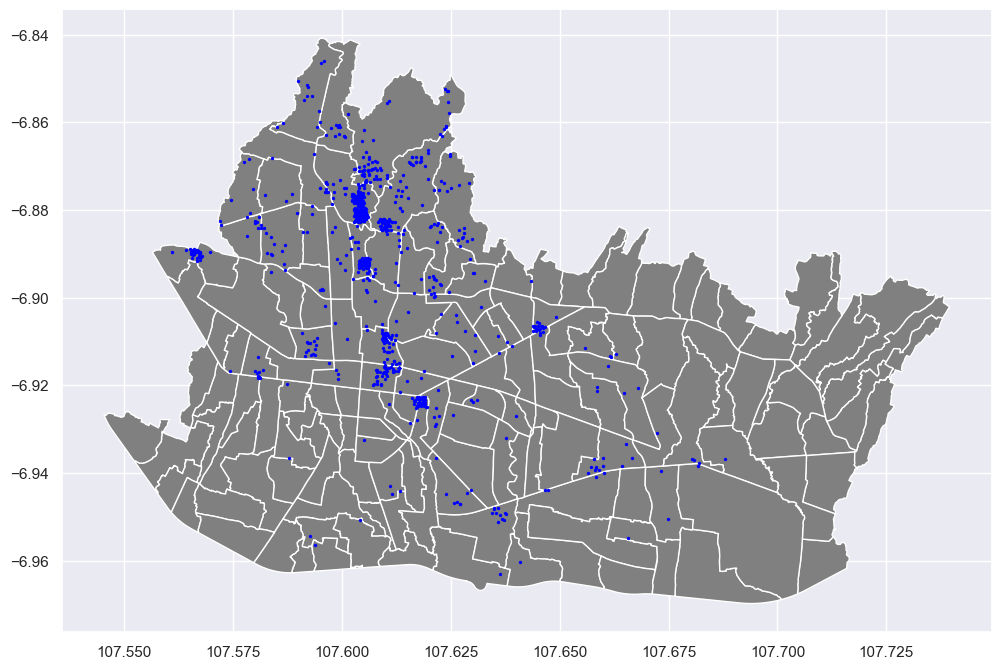

In [45]:
# Let's plot the Airbnb data in Bandung
fig, ax = plt.subplots(figsize=(12,10))
bdg.plot(color="gray", ax= ax);
airbnb_bdg_csactive.plot(ax=ax, color='blue', markersize=2)

### BANDUNG

In [46]:
# Perform Spatial Join
sjoined_bdg_listings = gpd.sjoin(airbnb_bdg_csactive, bdg, op="within")
sjoined_bdg_listings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 917 entries, 0 to 3861
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Property ID                    917 non-null    object  
 1   Listing Title                  917 non-null    object  
 2   Property Type                  917 non-null    object  
 3   Listing Type                   917 non-null    object  
 4   Created Date                   917 non-null    object  
 5   Last Scraped Date              917 non-null    object  
 6   Country                        917 non-null    object  
 7   State                          917 non-null    object  
 8   City                           917 non-null    object  
 9   Zipcode                        0 non-null      float64 
 10  Neighborhood                   0 non-null      float64 
 11  Metropolitan Statistical Area  0 non-null      float64 
 12  Currency Native            

In [47]:
sjoined_bdg_listings["Bedrooms"]=sjoined_bdg_listings["Bedrooms"].replace(0,1)
sjoined_bdg_listings['PPB'] = sjoined_bdg_listings['Average Daily Rate (USD)']/sjoined_bdg_listings['Bedrooms']

In [48]:
#Group the listings that has the same KELURAHAN code information
grouped = sjoined_bdg_listings.groupby("nama_kelurahan").size()
df_bdg = grouped.to_frame().reset_index()
df_bdg.columns = ['nama_kelurahan', 'listings_count']
df_bdg

nama_kelurahan  listings_count
0    Antapani Kidul               2
1    Antapani Kulon               3
2   Antapani Tengah               3
3    Antapani Wetan               1
4            Arjuna              14
..              ...             ...
74         Sukarasa               4
75        Sukawarna               8
76       Taman Sari               9
77         Turangga               1
78   Warung Muncang               3

[79 rows x 2 columns]

In [49]:
# Merge it back to Kelurahan data
airbnbcs_bdg = bdg.merge(df_bdg, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
#airbnbcs_bdg = bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbcs_bdg = airbnbcs_bdg.fillna(0)
airbnbcs_bdg

OBJECTID          swk  kode_kecamatan nama_kecamatan    nama_kelurahan  \
0           1  Ujungberung         3273111    Panyileukan       Mekar Mulya   
1           2  Ujungberung         3273111    Panyileukan    Cipadung Wetan   
2           3  Ujungberung         3273111    Panyileukan    Cipadung Kidul   
3           4  Ujungberung         3273120    Ujungberung       Pasir Endah   
4           5  Ujungberung         3273120    Ujungberung         Cigending   
..        ...          ...             ...            ...               ...   
146       147     Gedebage         3273101       Gedebage  Cisaranten Kidul   
147       148    Arcamanik         3273141       Antapani   Antapani Tengah   
148       149     Gedebage         3273100      Rancasari        Manjahlega   
149       150    Arcamanik         3273130      Arcamanik  Cisaranten Kulon   
150       151    Arcamanik         3273130      Arcamanik  Cisaranten Endah   

     shape_length    shape_area  \
0     5378.370410  1.541476e+06   
1     4236.950017  8.411177e+05   
2     5402.887752  1.523937e+06   
3     5123.466646  9.543637e+05   
4     4161.086917  8.920893e+05   
..            ...           ...   
146  11941.188868  6.773519e+06   
147   8248.194868  1.878189e+06   
148   4320.986849  6.344518e+05   
149   2027.537077  1.431960e+05   
150   4754.882345  9.418916e+05   

                                              geometry  listings_count  
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...             0.0  
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...             0.0  
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...             0.0  
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...             0.0  
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...             0.0  
..                                                 ...             ...  
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...             1.0  
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...             3.0  
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...             1.0  
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...             3.0  
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...             1.0  

[151 rows x 9 columns]

In [50]:
#Group the listings that has the same KELURAHAN code information based on TOTAL
grouped = sjoined_bdg_listings.groupby("nama_kelurahan").sum()
df_bdg = grouped.reset_index()
df_bdg

nama_kelurahan  Zipcode  Neighborhood  Metropolitan Statistical Area  \
0    Antapani Kidul      0.0           0.0                            0.0   
1    Antapani Kulon      0.0           0.0                            0.0   
2   Antapani Tengah      0.0           0.0                            0.0   
3    Antapani Wetan      0.0           0.0                            0.0   
4            Arjuna      0.0           0.0                            0.0   
..              ...      ...           ...                            ...   
74         Sukarasa      0.0           0.0                            0.0   
75        Sukawarna      0.0           0.0                            0.0   
76       Taman Sari      0.0           0.0                            0.0   
77         Turangga      0.0           0.0                            0.0   
78   Warung Muncang      0.0           0.0                            0.0   

    Average Daily Rate (USD)  Average Daily Rate (Native)  \
0                     110.23                   1581900.00   
1                     113.78                   1643736.00   
2                      84.42                   1200913.00   
3                      39.65                    578207.00   
4                     628.51                   8069720.38   
..                       ...                          ...   
74                    337.34                   4774580.00   
75                    167.50                   2355230.00   
76                    295.57                   2552611.00   
77                     15.07                        15.07   
78                     41.94                    605876.00   

    Annual Revenue LTM (USD)  Annual Revenue LTM (Native)  Occupancy Rate LTM  \
0                     5258.0                   75421700.0               0.533   
1                     3341.0                   48106000.0               0.484   
2                     8776.0                  124560000.0               1.048   
3                     6145.0                   89622040.0               0.480   
4                    45228.0                  638455180.0               5.295   
..                       ...                          ...                 ...   
74                   34138.0                  484594940.0               0.958   
75                    5351.0                   75743723.0               1.494   
76                   12902.0                  155818054.0               2.687   
77                     211.0                        211.0               0.152   
78                    2200.0                   31985714.0               0.720   

    Number of Bookings LTM  ...  Airbnb Home Collection  License  \
0                     52.0  ...                     0.0      0.0   
1                     83.0  ...                     0.0      0.0   
2                     79.0  ...                     0.0      0.0   
3                     66.0  ...                     0.0      0.0   
4                    351.0  ...                     0.0      0.0   
..                     ...  ...                     ...      ...   
74                   163.0  ...                     0.0      0.0   
75                    96.0  ...                     0.0      0.0   
76                   117.0  ...                     0.0      0.0   
77                     4.0  ...                     0.0      0.0   
78                     4.0  ...                     0.0      0.0   

    Airbnb Property ID  Airbnb Host ID  index_right  OBJECTID  kode_kecamatan  \
0           40547106.0    2.803820e+08          274       276         6546282   
1           57892065.0    3.512461e+08          399       402         9819423   
2           83508597.0    4.641019e+08          441       444         9819423   
3           22758959.0    1.681001e+08          138       139         3273141   
4          428982319.0    2.169778e+09         1498      1512        45824660   
..                 ...             ...          ...       ...          

In [51]:
# Merge it back to Kelurahan data
airbnbrev_bdg = bdg.merge(df_bdg, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
#airbnbcs_bdg = bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbrev_bdg = airbnbrev_bdg.fillna(0)
airbnbrev_bdg

OBJECTID_x          swk  kode_kecamatan_x nama_kecamatan  \
0             1  Ujungberung           3273111    Panyileukan   
1             2  Ujungberung           3273111    Panyileukan   
2             3  Ujungberung           3273111    Panyileukan   
3             4  Ujungberung           3273120    Ujungberung   
4             5  Ujungberung           3273120    Ujungberung   
..          ...          ...               ...            ...   
146         147     Gedebage           3273101       Gedebage   
147         148    Arcamanik           3273141       Antapani   
148         149     Gedebage           3273100      Rancasari   
149         150    Arcamanik           3273130      Arcamanik   
150         151    Arcamanik           3273130      Arcamanik   

       nama_kelurahan  shape_length_x  shape_area_x  \
0         Mekar Mulya     5378.370410  1.541476e+06   
1      Cipadung Wetan     4236.950017  8.411177e+05   
2      Cipadung Kidul     5402.887752  1.523937e+06   
3         Pasir Endah     5123.466646  9.543637e+05   
4           Cigending     4161.086917  8.920893e+05   
..                ...             ...           ...   
146  Cisaranten Kidul    11941.188868  6.773519e+06   
147   Antapani Tengah     8248.194868  1.878189e+06   
148        Manjahlega     4320.986849  6.344518e+05   
149  Cisaranten Kulon     2027.537077  1.431960e+05   
150  Cisaranten Endah     4754.882345  9.418916e+05   

                                              geometry  Zipcode  Neighborhood  \
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...      0.0           0.0   
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...      0.0           0.0   
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...      0.0           0.0   
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...      0.0           0.0   
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...      0.0           0.0   
..                                                 ...      ...           ...   
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...      0.0           0.0   
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...      0.0           0.0   
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...      0.0           0.0   
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...      0.0           0.0   
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...      0.0           0.0   

     ...  Airbnb Home Collection  License  Airbnb Property ID  Airbnb Host ID  \
0    ...                     0.0      0.0                 0.0             0.0   
1    ...                     0.0      0.0                 0.0             0.0   
2    ...                     0.0      0.0                 0.0             0.0   
3    ...                     0.0      0.0                 0.0             0.0   
4    ...                     0.0      0.0                 0.0             0.0   
..   ...                     ...      ...                 ...             ...   
146  ...                     0.0      0.0          17270008.0      15504627.0   
147  ...                     0.0      0.0          83508597.0     464101928.0   
148  ...                     0.0      0.0          36254362.0     272677248.0   
149  ...                     0.0      0.0          61257882.0     248537106.0   
150  ...                     0.0      0.0           5581859.0      28941317.0   

     index_right  OBJECTID_y  kode_kecamatan_y  shape_length_y  shape_area_y  \
0            0.0         0.0               0.0        0.000000  0.000000e+00   
1            0.0         0.0               0.0        0.000000  0.000000e+00   
2            0.0         0.0               0.0        0.000000  0.000000e+00   
3            0.0         0.0               0.0        0.000000  0.000000e+00   
4            0.0         0.0               0.0        0.000000  0.000000e+00   
..           ...         ...               ...             ...           ...   
146        146.0       147.0         3273101.0    11941.1

In [52]:
# Let's check the mean price
#Group the listings that has the same KELURAHAN code information
grouped = sjoined_bdg_listings['PPB'].groupby(sjoined_bdg_listings["nama_kelurahan"]).mean()
df_bdg_price = grouped.to_frame().reset_index()
df_bdg_price.columns = ['nama_kelurahan', 'Mean Price']
df_bdg_price

nama_kelurahan  Mean Price
0    Antapani Kidul   13.778750
1    Antapani Kulon   15.386000
2   Antapani Tengah   17.158333
3    Antapani Wetan    7.930000
4            Arjuna   27.634615
..              ...         ...
74         Sukarasa   23.521250
75        Sukawarna   14.950833
76       Taman Sari   27.612143
77         Turangga    5.023333
78   Warung Muncang   20.970000

[79 rows x 2 columns]

In [53]:
# Merge it back to Kelurahan data
airbnbcs_bdg1 = bdg.merge(df_bdg, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
#airbnbcs_bdg = bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbcs_bdg1 = airbnbcs_bdg1.fillna(0)
airbnbcs_bdg1

OBJECTID_x          swk  kode_kecamatan_x nama_kecamatan  \
0             1  Ujungberung           3273111    Panyileukan   
1             2  Ujungberung           3273111    Panyileukan   
2             3  Ujungberung           3273111    Panyileukan   
3             4  Ujungberung           3273120    Ujungberung   
4             5  Ujungberung           3273120    Ujungberung   
..          ...          ...               ...            ...   
146         147     Gedebage           3273101       Gedebage   
147         148    Arcamanik           3273141       Antapani   
148         149     Gedebage           3273100      Rancasari   
149         150    Arcamanik           3273130      Arcamanik   
150         151    Arcamanik           3273130      Arcamanik   

       nama_kelurahan  shape_length_x  shape_area_x  \
0         Mekar Mulya     5378.370410  1.541476e+06   
1      Cipadung Wetan     4236.950017  8.411177e+05   
2      Cipadung Kidul     5402.887752  1.523937e+06   
3         Pasir Endah     5123.466646  9.543637e+05   
4           Cigending     4161.086917  8.920893e+05   
..                ...             ...           ...   
146  Cisaranten Kidul    11941.188868  6.773519e+06   
147   Antapani Tengah     8248.194868  1.878189e+06   
148        Manjahlega     4320.986849  6.344518e+05   
149  Cisaranten Kulon     2027.537077  1.431960e+05   
150  Cisaranten Endah     4754.882345  9.418916e+05   

                                              geometry  Zipcode  Neighborhood  \
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...      0.0           0.0   
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...      0.0           0.0   
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...      0.0           0.0   
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...      0.0           0.0   
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...      0.0           0.0   
..                                                 ...      ...           ...   
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...      0.0           0.0   
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...      0.0           0.0   
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...      0.0           0.0   
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...      0.0           0.0   
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...      0.0           0.0   

     ...  Airbnb Home Collection  License  Airbnb Property ID  Airbnb Host ID  \
0    ...                     0.0      0.0                 0.0             0.0   
1    ...                     0.0      0.0                 0.0             0.0   
2    ...                     0.0      0.0                 0.0             0.0   
3    ...                     0.0      0.0                 0.0             0.0   
4    ...                     0.0      0.0                 0.0             0.0   
..   ...                     ...      ...                 ...             ...   
146  ...                     0.0      0.0          17270008.0      15504627.0   
147  ...                     0.0      0.0          83508597.0     464101928.0   
148  ...                     0.0      0.0          36254362.0     272677248.0   
149  ...                     0.0      0.0          61257882.0     248537106.0   
150  ...                     0.0      0.0           5581859.0      28941317.0   

     index_right  OBJECTID_y  kode_kecamatan_y  shape_length_y  shape_area_y  \
0            0.0         0.0               0.0        0.000000  0.000000e+00   
1            0.0         0.0               0.0        0.000000  0.000000e+00   
2            0.0         0.0               0.0        0.000000  0.000000e+00   
3            0.0         0.0               0.0        0.000000  0.000000e+00   
4            0.0         0.0               0.0        0.000000  0.000000e+00   
..           ...         ...               ...             ...           ...   
146        146.0       147.0         3273101.0    11941.1

In [54]:
# Merge it back to Kelurahan data
airbnbcs_bdg = airbnbcs_bdg.merge(df_bdg_price, left_on="nama_kelurahan", right_on='nama_kelurahan', how="outer")
# Change null values to zero
airbnbcs_bdg = airbnbcs_bdg.fillna(0)
airbnbcs_bdg

OBJECTID          swk  kode_kecamatan nama_kecamatan    nama_kelurahan  \
0           1  Ujungberung         3273111    Panyileukan       Mekar Mulya   
1           2  Ujungberung         3273111    Panyileukan    Cipadung Wetan   
2           3  Ujungberung         3273111    Panyileukan    Cipadung Kidul   
3           4  Ujungberung         3273120    Ujungberung       Pasir Endah   
4           5  Ujungberung         3273120    Ujungberung         Cigending   
..        ...          ...             ...            ...               ...   
146       147     Gedebage         3273101       Gedebage  Cisaranten Kidul   
147       148    Arcamanik         3273141       Antapani   Antapani Tengah   
148       149     Gedebage         3273100      Rancasari        Manjahlega   
149       150    Arcamanik         3273130      Arcamanik  Cisaranten Kulon   
150       151    Arcamanik         3273130      Arcamanik  Cisaranten Endah   

     shape_length    shape_area  \
0     5378.370410  1.541476e+06   
1     4236.950017  8.411177e+05   
2     5402.887752  1.523937e+06   
3     5123.466646  9.543637e+05   
4     4161.086917  8.920893e+05   
..            ...           ...   
146  11941.188868  6.773519e+06   
147   8248.194868  1.878189e+06   
148   4320.986849  6.344518e+05   
149   2027.537077  1.431960e+05   
150   4754.882345  9.418916e+05   

                                              geometry  listings_count  \
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...             0.0   
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...             0.0   
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...             0.0   
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...             0.0   
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...             0.0   
..                                                 ...             ...   
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...             1.0   
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...             3.0   
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...             1.0   
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...             3.0   
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...             1.0   

     Mean Price  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
146    0.000000  
147   17.158333  
148   22.083333  
149   12.375000  
150   10.577500  

[151 rows x 10 columns]

<AxesSubplot:>

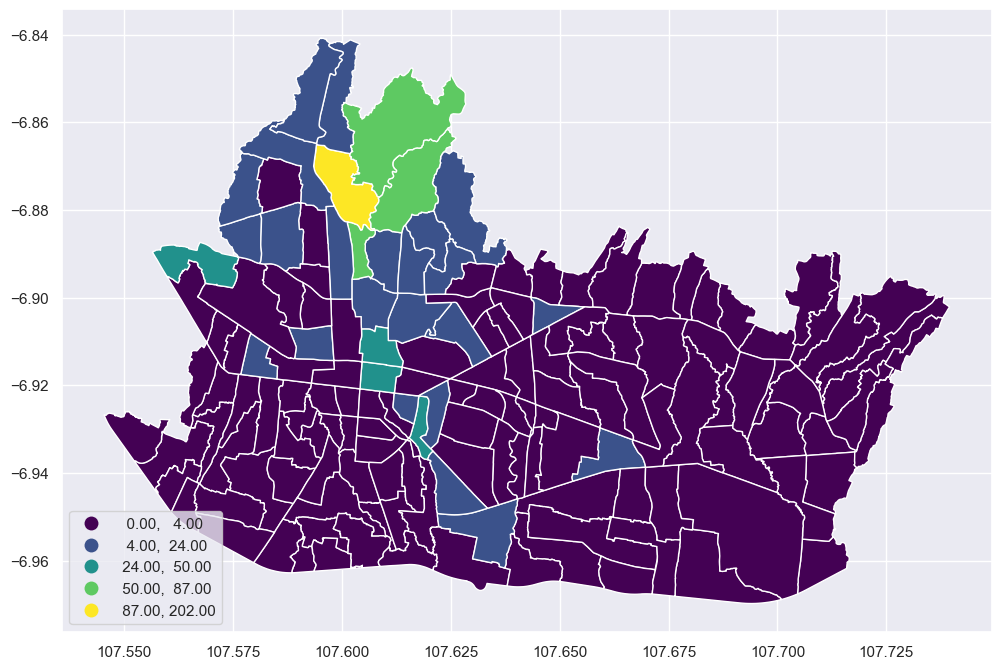

In [55]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbcs_bdg.plot(ax=ax, column="listings_count", scheme='fisher_jenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})
#airbnb_jkt_csactive.plot(ax=ax, color='black', markersize=2);

In [56]:
airbnbcs_bdg1

OBJECTID_x          swk  kode_kecamatan_x nama_kecamatan  \
0             1  Ujungberung           3273111    Panyileukan   
1             2  Ujungberung           3273111    Panyileukan   
2             3  Ujungberung           3273111    Panyileukan   
3             4  Ujungberung           3273120    Ujungberung   
4             5  Ujungberung           3273120    Ujungberung   
..          ...          ...               ...            ...   
146         147     Gedebage           3273101       Gedebage   
147         148    Arcamanik           3273141       Antapani   
148         149     Gedebage           3273100      Rancasari   
149         150    Arcamanik           3273130      Arcamanik   
150         151    Arcamanik           3273130      Arcamanik   

       nama_kelurahan  shape_length_x  shape_area_x  \
0         Mekar Mulya     5378.370410  1.541476e+06   
1      Cipadung Wetan     4236.950017  8.411177e+05   
2      Cipadung Kidul     5402.887752  1.523937e+06   
3         Pasir Endah     5123.466646  9.543637e+05   
4           Cigending     4161.086917  8.920893e+05   
..                ...             ...           ...   
146  Cisaranten Kidul    11941.188868  6.773519e+06   
147   Antapani Tengah     8248.194868  1.878189e+06   
148        Manjahlega     4320.986849  6.344518e+05   
149  Cisaranten Kulon     2027.537077  1.431960e+05   
150  Cisaranten Endah     4754.882345  9.418916e+05   

                                              geometry  Zipcode  Neighborhood  \
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...      0.0           0.0   
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...      0.0           0.0   
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...      0.0           0.0   
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...      0.0           0.0   
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...      0.0           0.0   
..                                                 ...      ...           ...   
146  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...      0.0           0.0   
147  POLYGON Z ((107.66850 -6.91635 0.00000, 107.66...      0.0           0.0   
148  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...      0.0           0.0   
149  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...      0.0           0.0   
150  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...      0.0           0.0   

     ...  Airbnb Home Collection  License  Airbnb Property ID  Airbnb Host ID  \
0    ...                     0.0      0.0                 0.0             0.0   
1    ...                     0.0      0.0                 0.0             0.0   
2    ...                     0.0      0.0                 0.0             0.0   
3    ...                     0.0      0.0                 0.0             0.0   
4    ...                     0.0      0.0                 0.0             0.0   
..   ...                     ...      ...                 ...             ...   
146  ...                     0.0      0.0          17270008.0      15504627.0   
147  ...                     0.0      0.0          83508597.0     464101928.0   
148  ...                     0.0      0.0          36254362.0     272677248.0   
149  ...                     0.0      0.0          61257882.0     248537106.0   
150  ...                     0.0      0.0           5581859.0      28941317.0   

     index_right  OBJECTID_y  kode_kecamatan_y  shape_length_y  shape_area_y  \
0            0.0         0.0               0.0        0.000000  0.000000e+00   
1            0.0         0.0               0.0        0.000000  0.000000e+00   
2            0.0         0.0               0.0        0.000000  0.000000e+00   
3            0.0         0.0               0.0        0.000000  0.000000e+00   
4            0.0         0.0               0.0        0.000000  0.000000e+00   
..           ...         ...               ...             ...           ...   
146        146.0       147.0         3273101.0    11941.1

<AxesSubplot:>

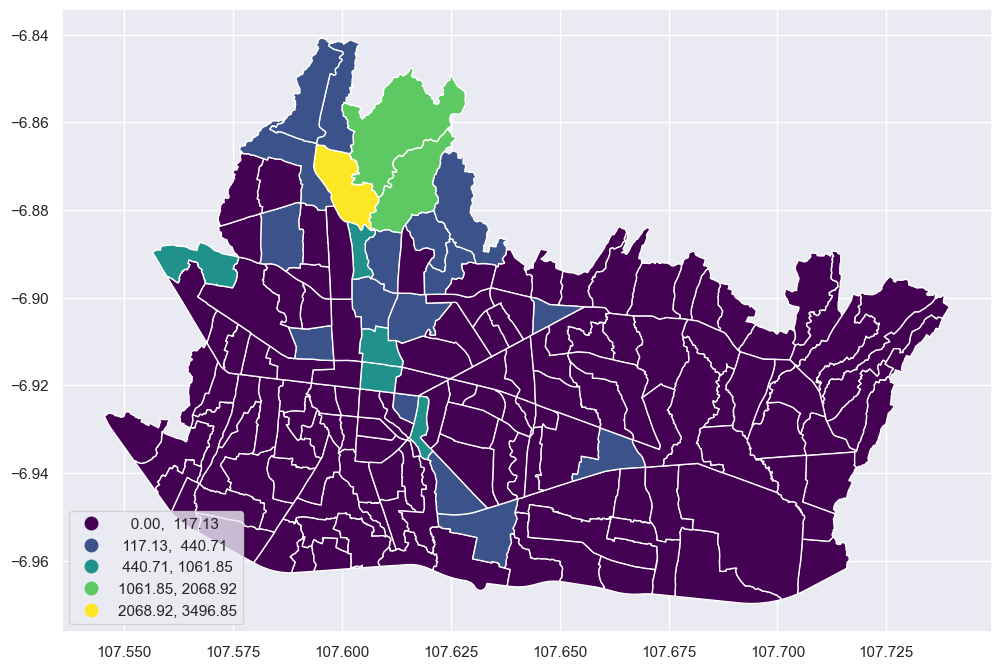

In [57]:
# Let's plot our data - in spatial join you need to make sure the accuracy of your operation is correct
fig, ax = plt.subplots(figsize=(12,10))
airbnbcs_bdg1.plot(ax=ax, column="PPB", scheme='fisher_jenks', cmap="viridis", legend= True, legend_kwds={'loc': 'lower left'})

In [58]:
# Let's join the airbnbcs data with airbnbrev data
airbnb_jkt = gpd.pd.concat([airbnbcs_jkt, airbnbrev_jkt])
airbnb_bdg = gpd.pd.concat([airbnbcs_bdg, airbnbrev_bdg])

In [59]:
airbnb_jkt.to_file('airbnb_jkt_regions.shp')
airbnb_bdg.to_file('airbnb_bdg_regions.shp')

### Merging with OSM Data (Explanatory Variables)

<AxesSubplot:>

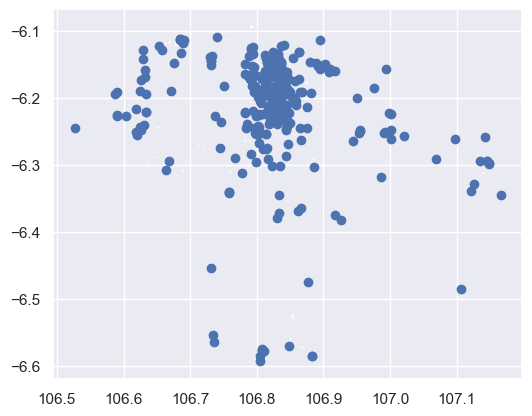

In [60]:
accommodation_jkt = gpd.read_file(os.path.join('accommodation_jkt.geojson'))
accommodation_jkt.plot()

<AxesSubplot:>

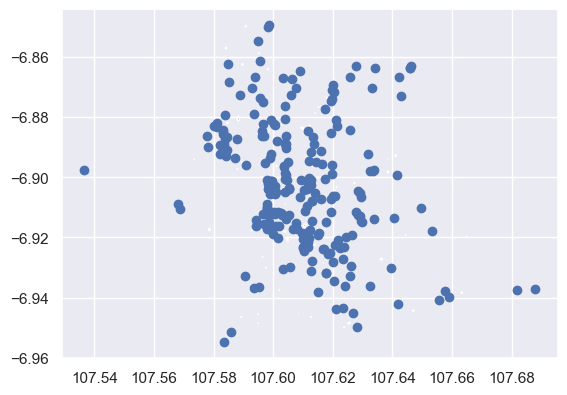

In [61]:
accommodation_bdg = gpd.read_file(os.path.join('accommodation_bdg.geojson'))
accommodation_bdg.plot()

In [62]:
# Read in Bandung spatial data (json file from Bandung open data)
bdg = gpd.read_file(os.path.join('kota-bandung-level-kelurahan.json'))
# Read in Jakarta Spatial data
jkt = gpd.read_file(os.path.join('dki_kelurahan','dki_kelurahan.shp'))
jkt = jkt.to_crs('epsg:4326')
bdg

# Data Sources (Bandung)
# Read the Airbnb listings per-kelurahan (polygon data)
airbnb_bdg_kel= gpd.read_file(os.path.join('Airbnb_bdg_regions.shp'))
# Read the Airbnb listings per-kelurahan (cs) data (polygon data)
airbnb_jkt_kel = gpd.read_file(os.path.join('Airbnb_jkt_regions.shp'))

# Read in POI Spatial Data (point data)
Mall = gpd.read_file(os.path.join('shopping_bdg.geojson'))
Restaurant = gpd.read_file(os.path.join('restaurants_bdg.geojson'))
Hotels = gpd.read_file(os.path.join('accommodation_bdg.geojson'))
Parks = gpd.read_file(os.path.join('parks_bdg.geojson'))
Attractions = gpd.read_file(os.path.join('attractions_bdg.geojson'))

airbnb_bdg_kel

OBJECTID          swk  kode_kecam   nama_kecam        nama_kelur  \
0         1.0  Ujungberung   3273111.0  Panyileukan       Mekar Mulya   
1         2.0  Ujungberung   3273111.0  Panyileukan    Cipadung Wetan   
2         3.0  Ujungberung   3273111.0  Panyileukan    Cipadung Kidul   
3         4.0  Ujungberung   3273120.0  Ujungberung       Pasir Endah   
4         5.0  Ujungberung   3273120.0  Ujungberung         Cigending   
..        ...          ...         ...          ...               ...   
297       NaN     Gedebage         NaN     Gedebage  Cisaranten Kidul   
298       NaN    Arcamanik         NaN     Antapani   Antapani Tengah   
299       NaN     Gedebage         NaN    Rancasari        Manjahlega   
300       NaN    Arcamanik         NaN    Arcamanik  Cisaranten Kulon   
301       NaN    Arcamanik         NaN    Arcamanik  Cisaranten Endah   

      shape_leng    shape_area  listings_c  Mean Price  OBJECTID_x  ...  \
0    5378.370410  1.541476e+06         0.0         0.0         NaN  ...   
1    4236.950017  8.411177e+05         0.0         0.0         NaN  ...   
2    5402.887752  1.523937e+06         0.0         0.0         NaN  ...   
3    5123.466646  9.543637e+05         0.0         0.0         NaN  ...   
4    4161.086917  8.920893e+05         0.0         0.0         NaN  ...   
..           ...           ...         ...         ...         ...  ...   
297          NaN           NaN         NaN         NaN       147.0  ...   
298          NaN           NaN         NaN         NaN       148.0  ...   
299          NaN           NaN         NaN         NaN       149.0  ...   
300          NaN           NaN         NaN         NaN       150.0  ...   
301          NaN           NaN         NaN         NaN       151.0  ...   

     License  Airbnb P_1   Airbnb Hos  index_righ  OBJECTID_y  kode_kec_2  \
0        NaN         NaN          NaN         NaN         NaN         NaN   
1        NaN         NaN          NaN         NaN         NaN         NaN   
2        NaN         NaN          NaN         NaN         NaN         NaN   
3        NaN         NaN          NaN         NaN         NaN         NaN   
4        NaN         NaN          NaN         NaN         NaN         NaN   
..       ...         ...          ...         ...         ...         ...   
297      0.0  17270008.0   15504627.0       146.0       147.0   3273101.0   
298      0.0  83508597.0  464101928.0       441.0       444.0   9819423.0   
299      0.0  36254362.0  272677248.0       148.0       149.0   3273100.0   
300      0.0  61257882.0  248537106.0       447.0       450.0   9819390.0   
301      0.0   5581859.0   28941317.0       150.0       151.0   3273130.0   

       shape_le_2    shape_ar_2        PPB  \
0             NaN           NaN        NaN   
1             NaN           NaN        NaN   
2             NaN           NaN        NaN   
3             NaN           NaN        NaN   
4             NaN           NaN        NaN   
..            ...           ...        ...   
297  11941.188868  6.773519e+06   0.000000   
298  24744.584605  5.634568e+06  34.316667   
299   4320.986849  6.344518e+05  22.083333   
300   6082.611232  4.295881e+05  24.750000   
301   4754.882345  9.418916e+05  10.577500   

                                              geometry  
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...  
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...  
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...  
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...  
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...  
..                                                 ...  
297  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...  
298  POLYGON ((107.66850 -6.91635, 107.66853 -6.916...  
299  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...  
300  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...  
301  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...  

[302 rows x 63 columns]

In [63]:
airbnb_bdg_all = airbnb_bdg_kel.fillna(0)
airbnb_bdg_all

OBJECTID          swk  kode_kecam   nama_kecam        nama_kelur  \
0         1.0  Ujungberung   3273111.0  Panyileukan       Mekar Mulya   
1         2.0  Ujungberung   3273111.0  Panyileukan    Cipadung Wetan   
2         3.0  Ujungberung   3273111.0  Panyileukan    Cipadung Kidul   
3         4.0  Ujungberung   3273120.0  Ujungberung       Pasir Endah   
4         5.0  Ujungberung   3273120.0  Ujungberung         Cigending   
..        ...          ...         ...          ...               ...   
297       0.0     Gedebage         0.0     Gedebage  Cisaranten Kidul   
298       0.0    Arcamanik         0.0     Antapani   Antapani Tengah   
299       0.0     Gedebage         0.0    Rancasari        Manjahlega   
300       0.0    Arcamanik         0.0    Arcamanik  Cisaranten Kulon   
301       0.0    Arcamanik         0.0    Arcamanik  Cisaranten Endah   

      shape_leng    shape_area  listings_c  Mean Price  OBJECTID_x  ...  \
0    5378.370410  1.541476e+06         0.0         0.0         0.0  ...   
1    4236.950017  8.411177e+05         0.0         0.0         0.0  ...   
2    5402.887752  1.523937e+06         0.0         0.0         0.0  ...   
3    5123.466646  9.543637e+05         0.0         0.0         0.0  ...   
4    4161.086917  8.920893e+05         0.0         0.0         0.0  ...   
..           ...           ...         ...         ...         ...  ...   
297     0.000000  0.000000e+00         0.0         0.0       147.0  ...   
298     0.000000  0.000000e+00         0.0         0.0       148.0  ...   
299     0.000000  0.000000e+00         0.0         0.0       149.0  ...   
300     0.000000  0.000000e+00         0.0         0.0       150.0  ...   
301     0.000000  0.000000e+00         0.0         0.0       151.0  ...   

     License  Airbnb P_1   Airbnb Hos  index_righ  OBJECTID_y  kode_kec_2  \
0        0.0         0.0          0.0         0.0         0.0         0.0   
1        0.0         0.0          0.0         0.0         0.0         0.0   
2        0.0         0.0          0.0         0.0         0.0         0.0   
3        0.0         0.0          0.0         0.0         0.0         0.0   
4        0.0         0.0          0.0         0.0         0.0         0.0   
..       ...         ...          ...         ...         ...         ...   
297      0.0  17270008.0   15504627.0       146.0       147.0   3273101.0   
298      0.0  83508597.0  464101928.0       441.0       444.0   9819423.0   
299      0.0  36254362.0  272677248.0       148.0       149.0   3273100.0   
300      0.0  61257882.0  248537106.0       447.0       450.0   9819390.0   
301      0.0   5581859.0   28941317.0       150.0       151.0   3273130.0   

       shape_le_2    shape_ar_2        PPB  \
0        0.000000  0.000000e+00   0.000000   
1        0.000000  0.000000e+00   0.000000   
2        0.000000  0.000000e+00   0.000000   
3        0.000000  0.000000e+00   0.000000   
4        0.000000  0.000000e+00   0.000000   
..            ...           ...        ...   
297  11941.188868  6.773519e+06   0.000000   
298  24744.584605  5.634568e+06  34.316667   
299   4320.986849  6.344518e+05  22.083333   
300   6082.611232  4.295881e+05  24.750000   
301   4754.882345  9.418916e+05  10.577500   

                                              geometry  
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...  
1    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...  
2    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...  
3    POLYGON ((107.68876 -6.89804, 107.68881 -6.898...  
4    POLYGON ((107.69814 -6.90756, 107.69824 -6.907...  
..                                                 ...  
297  POLYGON ((107.70158 -6.94609, 107.70159 -6.946...  
298  POLYGON ((107.66850 -6.91635, 107.66853 -6.916...  
299  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...  
300  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...  
301  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...  

[302 rows x 63 columns]

In [64]:
# Perform Spatial Join on POIs data
data_mall = gpd.sjoin(Mall, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_mall.groupby("nama_kelurahan").size()
df_mall = grouped.to_frame().reset_index()
df_mall.columns = ['nama_kelur', 'mall']
df_mall

# Perform Spatial Join on POIs data
data_attractions = gpd.sjoin(Attractions, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_attractions.groupby("nama_kelurahan").size()
df_attractions = grouped.to_frame().reset_index()
df_attractions.columns = ['nama_kelur', 'attractions']
df_attractions

# Perform Spatial Join on POIs data
data_restaurant = gpd.sjoin(Restaurant, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_restaurant.groupby("nama_kelurahan").size()
df_restaurant = grouped.to_frame().reset_index()
df_restaurant.columns = ['nama_kelur', 'restaurant']
df_restaurant

# Perform Spatial Join on POIs data
df_parks = gpd.sjoin(Parks, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = df_parks.groupby("nama_kelurahan").size()
df_parks = grouped.to_frame().reset_index()
df_parks.columns = ['nama_kelur', 'parks']
df_parks

# Perform Spatial Join on POIs data
data_hotels = gpd.sjoin(Hotels, bdg, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_hotels.groupby("nama_kelurahan").size()
df_hotels = grouped.to_frame().reset_index()
df_hotels.columns = ['nama_kelur', 'hotels']
df_hotels

nama_kelur  hotels
0             Ancol       1
1    Antapani Kidul       1
2   Antapani Tengah       1
3            Arjuna       4
4    Babakan Ciamis       6
..              ...     ...
70         Sukaraja       1
71         Sukarasa       2
72        Sukawarna       8
73       Taman Sari      17
74         Turangga       4

[75 rows x 2 columns]

In [65]:
# Merge it back to Airbnb_Kelurahan data
airbnb_bdg_all1 = airbnb_bdg_all.merge(df_mall, on="nama_kelur", how="outer")
airbnb_bdg_all2 = airbnb_bdg_all1.merge(df_restaurant, on="nama_kelur", how="outer")
airbnb_bdg_all3 = airbnb_bdg_all2.merge(df_attractions, on="nama_kelur", how="outer")
airbnb_bdg_all4 = airbnb_bdg_all3.merge(df_parks, on="nama_kelur", how="outer")
airbnb_bdg_all= airbnb_bdg_all4.merge(df_hotels, on="nama_kelur", how="outer")

airbnb_bdg_all.columns

Index(['OBJECTID', 'swk', 'kode_kecam', 'nama_kecam', 'nama_kelur',
       'shape_leng', 'shape_area', 'listings_c', 'Mean Price', 'OBJECTID_x',
       'kode_kec_1', 'shape_le_1', 'shape_ar_1', 'Zipcode', 'Neighborho',
       'Metropolit', 'Average Da', 'Average _1', 'Annual Rev', 'Annual R_1',
       'Occupancy', 'Number of', 'Number o_1', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Response R', 'Security D', 'Security_1', 'Cleaning F',
       'Cleaning_1', 'Extra Peop', 'Extra Pe_1', 'Published', 'Publishe_1',
       'Publishe_2', 'Minimum St', 'Count Rese', 'Count Avai', 'Count Bloc',
       'Number o_2', 'Instantboo', 'Latitude', 'Longitude', 'Overall Ra',
       'Airbnb Com', 'Airbnb Acc', 'Airbnb Cle', 'Airbnb Che', 'Airbnb Loc',
       'Airbnb Val', 'Airbnb Pro', 'Airbnb Hom', 'License', 'Airbnb P_1',
       'Airbnb Hos', 'index_righ', 'OBJECTID_y', 'kode_kec_2', 'shape_le_2',
       'shape_ar_2', 'PPB', 'geometry', 'mall', 'restaurant', 'attractions',
       'parks', 'hotels

In [66]:
airbnb_bdg_all = airbnb_bdg_all.rename(columns ={'listings_c':'listings_count'})
airbnb_bdg_all = airbnb_bdg_all.rename(columns ={'Average Da':'ADR_USD'})

In [67]:
airbnb_bdg_all = airbnb_bdg_all.rename(columns ={'Average_1':'ADR_IDR'})
airbnb_bdg_all = airbnb_bdg_all.rename(columns ={'Annual Rev':'Revenue_USD'})
airbnb_bdg_all = airbnb_bdg_all.rename(columns ={'Annual R_1':'Revenue_IDR'})
airbnb_bdg_all = airbnb_bdg_all.rename(columns ={'Number of':'Bookings'})

In [68]:
airbnb_bdg_all = airbnb_bdg_all.fillna(0)
airbnb_bdg_all

OBJECTID          swk  kode_kecam   nama_kecam        nama_kelur  \
0         1.0  Ujungberung   3273111.0  Panyileukan       Mekar Mulya   
1         0.0  Ujungberung         0.0  Panyileukan       Mekar Mulya   
2         2.0  Ujungberung   3273111.0  Panyileukan    Cipadung Wetan   
3         0.0  Ujungberung         0.0  Panyileukan    Cipadung Wetan   
4         3.0  Ujungberung   3273111.0  Panyileukan    Cipadung Kidul   
..        ...          ...         ...          ...               ...   
297       0.0     Gedebage         0.0    Rancasari        Manjahlega   
298     150.0    Arcamanik   3273130.0    Arcamanik  Cisaranten Kulon   
299       0.0    Arcamanik         0.0    Arcamanik  Cisaranten Kulon   
300     151.0    Arcamanik   3273130.0    Arcamanik  Cisaranten Endah   
301       0.0    Arcamanik         0.0    Arcamanik  Cisaranten Endah   

      shape_leng    shape_area  listings_count  Mean Price  OBJECTID_x  ...  \
0    5378.370410  1.541476e+06             0.0      0.0000         0.0  ...   
1       0.000000  0.000000e+00             0.0      0.0000         1.0  ...   
2    4236.950017  8.411177e+05             0.0      0.0000         0.0  ...   
3       0.000000  0.000000e+00             0.0      0.0000         2.0  ...   
4    5402.887752  1.523937e+06             0.0      0.0000         0.0  ...   
..           ...           ...             ...         ...         ...  ...   
297     0.000000  0.000000e+00             0.0      0.0000       149.0  ...   
298  2027.537077  1.431960e+05             3.0     12.3750         0.0  ...   
299     0.000000  0.000000e+00             0.0      0.0000       150.0  ...   
300  4754.882345  9.418916e+05             1.0     10.5775         0.0  ...   
301     0.000000  0.000000e+00             0.0      0.0000       151.0  ...   

     kode_kec_2   shape_le_2     shape_ar_2        PPB  \
0           0.0     0.000000       0.000000   0.000000   
1           0.0     0.000000       0.000000   0.000000   
2           0.0     0.000000       0.000000   0.000000   
3           0.0     0.000000       0.000000   0.000000   
4           0.0     0.000000       0.000000   0.000000   
..          ...          ...            ...        ...   
297   3273100.0  4320.986849  634451.770795  22.083333   
298         0.0     0.000000       0.000000   0.000000   
299   9819390.0  6082.611232  429588.070257  24.750000   
300         0.0     0.000000       0.000000   0.000000   
301   3273130.0  4754.882345  941891.595395  10.577500   

                                              geometry  mall  restaurant  \
0    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...   0.0         0.0   
1    POLYGON ((107.70413 -6.92551, 107.70470 -6.926...   0.0         0.0   
2    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...   0.0         0.0   
3    POLYGON ((107.71771 -6.93470, 107.71786 -6.934...   0.0         0.0   
4    POLYGON ((107.71830 -6.93890, 107.71827 -6.938...   0.0         0.0   
..                                                 ...   ...         ...   
297  POLYGON ((107.67229 -6.95480, 107.67230 -6.955...   0.0         0.0   
298  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...   0.0         0.0   
299  POLYGON ((107.68166 -6.93780, 107.68124 -6.937...   0.0         0.0   
300  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...   0.0         0.0   
301  POLYGON ((107.67517 -6.92656, 107.67524 -6.926...   0.0         0.0   

     attractions  parks  hotels  
0            0.0    0.0     0.0  
1            0.0    0.0     0.0  
2            0.0    0.0     0.0  
3            0.0    0.0     0.0  
4            0.0    0.0     0.0  
..           ...    ...     ...  
297          0.0    1.0     0.0  
298          0.0    2.0     1.0  
299          0.0    2.0     1.0  
300          0.0    0.0     0.0  
301          0.0    0.0     0.0  

[302 rows x 68 columns]

In [91]:
airbnb_bdg_all['Hotel_Density']=airbnb_bdg_all['hotels']/sum(airbnb_bdg_all['hotels'])*100
airbnb_bdg_all['Mall_Density']=airbnb_bdg_all['mall']/sum(airbnb_bdg_all['mall'])*100
airbnb_bdg_all['Attractions_Density']=airbnb_bdg_all['attractions']/sum(airbnb_bdg_all['attractions'])*100
airbnb_bdg_all['Restaurant_Density']=airbnb_bdg_all['restaurant']/sum(airbnb_bdg_all['restaurant'])*100
airbnb_bdg_all['Parks_Density']=airbnb_bdg_all['parks']/sum(airbnb_bdg_all['parks'])*100
airbnbcs_bdg['Airbnb_Density']=airbnbcs_bdg['listings_count']/sum(airbnbcs_bdg['listings_count'])*100

In [70]:
airbnb_bdg_all

OBJECTID          swk  kode_kecam   nama_kecam        nama_kelur  \
0         1.0  Ujungberung   3273111.0  Panyileukan       Mekar Mulya   
1         0.0  Ujungberung         0.0  Panyileukan       Mekar Mulya   
2         2.0  Ujungberung   3273111.0  Panyileukan    Cipadung Wetan   
3         0.0  Ujungberung         0.0  Panyileukan    Cipadung Wetan   
4         3.0  Ujungberung   3273111.0  Panyileukan    Cipadung Kidul   
..        ...          ...         ...          ...               ...   
297       0.0     Gedebage         0.0    Rancasari        Manjahlega   
298     150.0    Arcamanik   3273130.0    Arcamanik  Cisaranten Kulon   
299       0.0    Arcamanik         0.0    Arcamanik  Cisaranten Kulon   
300     151.0    Arcamanik   3273130.0    Arcamanik  Cisaranten Endah   
301       0.0    Arcamanik         0.0    Arcamanik  Cisaranten Endah   

      shape_leng    shape_area  listings_count  Mean Price  OBJECTID_x  ...  \
0    5378.370410  1.541476e+06             0.0      0.0000         0.0  ...   
1       0.000000  0.000000e+00             0.0      0.0000         1.0  ...   
2    4236.950017  8.411177e+05             0.0      0.0000         0.0  ...   
3       0.000000  0.000000e+00             0.0      0.0000         2.0  ...   
4    5402.887752  1.523937e+06             0.0      0.0000         0.0  ...   
..           ...           ...             ...         ...         ...  ...   
297     0.000000  0.000000e+00             0.0      0.0000       149.0  ...   
298  2027.537077  1.431960e+05             3.0     12.3750         0.0  ...   
299     0.000000  0.000000e+00             0.0      0.0000       150.0  ...   
300  4754.882345  9.418916e+05             1.0     10.5775         0.0  ...   
301     0.000000  0.000000e+00             0.0      0.0000       151.0  ...   

     mall  restaurant  attractions  parks  hotels  Hotel_Density  \
0     0.0         0.0          0.0    0.0     0.0       0.000000   
1     0.0         0.0          0.0    0.0     0.0       0.000000   
2     0.0         0.0          0.0    0.0     0.0       0.000000   
3     0.0         0.0          0.0    0.0     0.0       0.000000   
4     0.0         0.0          0.0    0.0     0.0       0.000000   
..    ...         ...          ...    ...     ...            ...   
297   0.0         0.0          0.0    1.0     0.0       0.000000   
298   0.0         0.0          0.0    2.0     1.0       0.143266   
299   0.0         0.0          0.0    2.0     1.0       0.143266   
300   0.0         0.0          0.0    0.0     0.0       0.000000   
301   0.0         0.0          0.0    0.0     0.0       0.000000   

     Mall_Density  Attractions_Density  Restaurant_Density  Parks_Density  
0             0.0                  0.0                 0.0        0.00000  
1             0.0                  0.0                 0.0        0.00000  
2             0.0                  0.0                 0.0        0.00000  
3             0.0                  0.0                 0.0        0.00000  
4             0.0                  0.0                 0.0        0.00000  
..            ...                  ...                 ...            ...  
297           0.0                  0.0                 0.0        0.16835  
298           0.0                  0.0                 0.0        0.33670  
299           0.0                  0.0                 0.0        0.33670  
300           0.0                  0.0                 0.0        0.00000  
301           0.0                  0.0                 0.0        0.00000  

[302 rows x 73 columns]

In [71]:
#Save to shapefile
airbnb_bdg_all.to_file("AirbnbPOI_bdg.shp")

In [72]:
# Data Sources (Jakarta)

# Read in POI Spatial Data (point data)
Mall_jkt = gpd.read_file(os.path.join('shopping_jkt.geojson'))
Restaurant_jkt = gpd.read_file(os.path.join('restaurants_jkt.geojson'))
Hotels_jkt = gpd.read_file(os.path.join('accommodation_jkt.geojson'))
Parks_jkt = gpd.read_file(os.path.join('parks_jkt.geojson'))
Attractions_jkt = gpd.read_file(os.path.join('attractions_jkt.geojson'))

airbnb_jkt_kel

KEL_NAME          Kecamatan          ID  listings_c  Zipcode  \
0                ANCOL         PADEMANGAN  3175020003        34.0      NaN   
1                ANGKE            TAMBORA  3174050007         2.0      NaN   
2         BALE KAMBANG        KRAMAT JATI  3172050001         0.0      NaN   
3          BALI MESTER         JATINEGARA  3172060007         0.0      NaN   
4           BAMBU APUS           CIPAYUNG  3172030006         3.0      NaN   
..                 ...                ...         ...         ...      ...   
519            WARAKAS      TANJUNG PRIOK  3175030004         NaN      0.0   
520      WIJAYA KESUMA  GROGOL PETAMBURAN  3174040006         NaN      0.0   
521              KAMAL          KALIDERES  3174080005         NaN      0.0   
522        SUNTER JAYA      TANJUNG PRIOK  3175030002         NaN      0.0   
523  RAWABADAK SELATAN               KOJA  3175040001         NaN      0.0   

     Neighborho  Metropolit  Average Da  Average _1  Annual Rev  ...  \
0           NaN         NaN         NaN         NaN         NaN  ...   
1           NaN         NaN         NaN         NaN         NaN  ...   
2           NaN         NaN         NaN         NaN         NaN  ...   
3           NaN         NaN         NaN         NaN         NaN  ...   
4           NaN         NaN         NaN         NaN         NaN  ...   
..          ...         ...         ...         ...         ...  ...   
519         0.0         0.0        0.00         0.0         0.0  ...   
520         0.0         0.0       18.64    264555.0       820.0  ...   
521         0.0         0.0        0.00         0.0         0.0  ...   
522         0.0         0.0       99.80   1405792.0     10788.0  ...   
523         0.0         0.0        0.00         0.0         0.0  ...   

     Airbnb Che  Airbnb Loc  Airbnb Val  Airbnb Pro  Airbnb Hom  License  \
0           NaN         NaN         NaN         NaN         NaN      NaN   
1           NaN         NaN         NaN         NaN         NaN      NaN   
2           NaN         NaN         NaN         NaN         NaN      NaN   
3           NaN         NaN         NaN         NaN         NaN      NaN   
4           NaN         NaN         NaN         NaN         NaN      NaN   
..          ...         ...         ...         ...         ...      ...   
519         0.0         0.0         0.0         0.0         0.0      0.0   
520         9.0         9.0         9.0         0.0         0.0      0.0   
521         0.0         0.0         0.0         0.0         0.0      0.0   
522        69.0        69.0        67.0         0.0         0.0      0.0   
523         0.0         0.0         0.0         0.0         0.0      0.0   

      Airbnb P_1   Airbnb Hos  index_righ  \
0            NaN          NaN         NaN   
1            NaN          NaN         NaN   
2            NaN          NaN         NaN   
3            NaN          NaN         NaN   
4            NaN          NaN         NaN   
..           ...          ...         ...   
519          0.0          0.0         0.0   
520   34859531.0   74568893.0       258.0   
521          0.0          0.0         0.0   
522  136269867.0  667903612.0      1820.0   
523          0.0          0.0         0.0   

                                              geometry  
0    MULTIPOLYGON (((106.87774 -6.09487, 106.87773 ...  
1    POLYGON ((106.80061 -6.14291, 106.80072 -6.145...  
2    POLYGON ((106.85802 -6.26768, 106.85834 -6.267...  
3    POLYGON ((106.87024 -6.22461, 106.87025 -6.224...  
4    MULTIPOLYGON (((106.91782 -6.30255, 106.91782 ...  
..                                                 ...  
519  POLYGON ((106.88315 -6.12464, 106.88316 -6.124...  
520  POLYGON ((106.78093 -6.15069, 106.78098 -6.150...  
521  POLYGON ((106.69456 -6.09564, 106.69576 -6.096...  
522  POLYGON ((106.88632 -6.14108, 106.88710 -6.141...  
523  POLYGON ((106.89595 -6.12349, 106.89715 -6.123...  

[524 rows x 49 columns]

<AxesSubplot:>

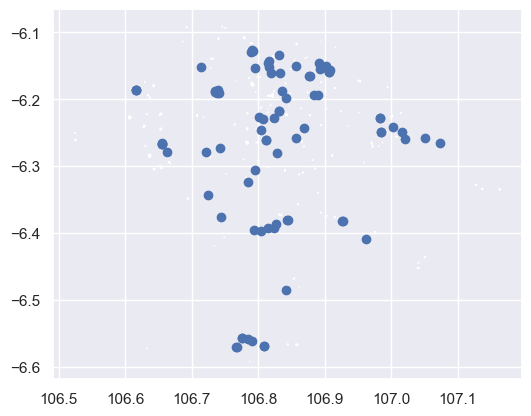

In [73]:
Mall_jkt.plot()

<AxesSubplot:>

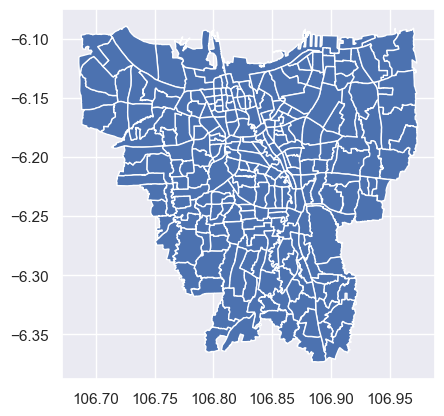

In [74]:
jkt.plot()

<AxesSubplot:>

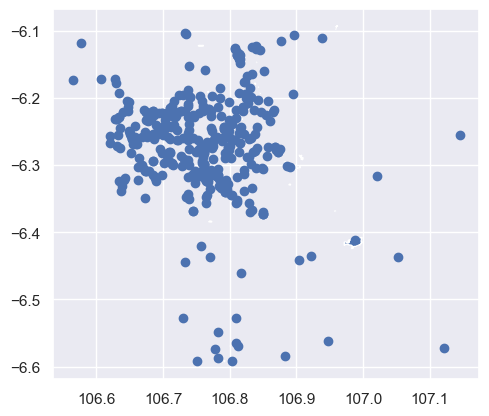

In [75]:
Attractions_jkt.plot()

In [76]:
# Perform Spatial Join on POIs data
data_mall = gpd.sjoin(Mall_jkt, jkt, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_mall.groupby("KEL_NAME").size()
df_mall_jkt = grouped.to_frame().reset_index()
df_mall_jkt.columns = ["KEL_NAME", 'malls']
df_mall_jkt

KEL_NAME  malls
0                 ANCOL      6
1           BALI MESTER      1
2                BANGKA      3
3       BENDUNGAN HILIR      9
4           BIDARA CINA      1
..                  ...    ...
79  TANJUNG DUREN UTARA      1
80                 TMII      1
81               TOMANG      1
82           TUGU UTARA      1
83              ULUJAMI      1

[84 rows x 2 columns]

In [77]:
# Perform Spatial Join on POIs data
data_restaurant = gpd.sjoin(Restaurant_jkt, jkt, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_restaurant.groupby("KEL_NAME").size()
df_restaurant_jkt = grouped.to_frame().reset_index()
df_restaurant_jkt.columns = ['KEL_NAME', 'restaurant']
df_restaurant_jkt

# Perform Spatial Join on POIs data
data_attractions_jkt = gpd.sjoin(Attractions_jkt, jkt, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_attractions_jkt.groupby("KEL_NAME").size()
df_attractions_jkt = grouped.to_frame().reset_index()
df_attractions_jkt.columns = ['KEL_NAME', 'attractions']
df_attractions_jkt

# Perform Spatial Join on POIs data
data_hotels = gpd.sjoin(Hotels_jkt, jkt, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_hotels.groupby("KEL_NAME").size()
df_hotels_jkt = grouped.to_frame().reset_index()
df_hotels_jkt.columns = ['KEL_NAME', 'hotels']
df_hotels_jkt

# Perform Spatial Join on POIs data
data_parks = gpd.sjoin(Parks_jkt, jkt, op="within")
#Group the listings that has the same KELURAHAN code information
grouped = data_parks.groupby("KEL_NAME").size()
df_parks_jkt = grouped.to_frame().reset_index()
df_parks_jkt.columns = ['KEL_NAME', 'parks']
df_parks_jkt

KEL_NAME  parks
0              ANCOL     20
1              ANGKE      1
2        BALI MESTER      5
3         BAMBU APUS      1
4         BATU AMPAR      1
..               ...    ...
189       TUGU UTARA      2
190    UJUNG MENTENG      1
191  UTAN KAYU UTARA      3
192          WARAKAS      1
193    WIJAYA KESUMA      3

[194 rows x 2 columns]

In [78]:
# Merge it back to Airbnb_Kelurahan data
airbnb_jkt_all1 = airbnb_jkt_kel.merge(df_parks_jkt, on="KEL_NAME", how="outer")
airbnb_jkt_all2 = airbnb_jkt_all1.merge(df_mall_jkt, on="KEL_NAME", how="outer")
airbnb_jkt_all3 = airbnb_jkt_all2.merge(df_attractions_jkt, on="KEL_NAME", how="outer")
airbnb_jkt_all4 = airbnb_jkt_all3.merge(df_restaurant_jkt, on="KEL_NAME", how="outer")
airbnb_jkt_all = airbnb_jkt_all4.merge(df_hotels_jkt, on="KEL_NAME", how="outer")
airbnb_jkt_all.columns

Index(['KEL_NAME', 'Kecamatan', 'ID', 'listings_c', 'Zipcode', 'Neighborho',
       'Metropolit', 'Average Da', 'Average _1', 'Annual Rev', 'Annual R_1',
       'Occupancy', 'Number of', 'Number o_1', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Response R', 'Security D', 'Security_1', 'Cleaning F',
       'Cleaning_1', 'Extra Peop', 'Extra Pe_1', 'Published', 'Publishe_1',
       'Publishe_2', 'Minimum St', 'Count Rese', 'Count Avai', 'Count Bloc',
       'Number o_2', 'Instantboo', 'Latitude', 'Longitude', 'Overall Ra',
       'Airbnb Com', 'Airbnb Acc', 'Airbnb Cle', 'Airbnb Che', 'Airbnb Loc',
       'Airbnb Val', 'Airbnb Pro', 'Airbnb Hom', 'License', 'Airbnb P_1',
       'Airbnb Hos', 'index_righ', 'geometry', 'parks', 'malls', 'attractions',
       'restaurant', 'hotels'],
      dtype='object')

In [79]:
airbnb_jkt_all = airbnb_jkt_all.rename(columns ={'listings_c':'listings_count'})
airbnb_jkt_all = airbnb_jkt_all.rename(columns ={'Average Da':'ADR_USD'})
airbnb_jkt_all = airbnb_jkt_all.rename(columns ={'Annual Rev':'Revenue_USD'})
airbnb_jkt_all = airbnb_jkt_all.rename(columns ={'Annual R_1':'Revenue_IDR'})
airbnb_jkt_all = airbnb_jkt_all.rename(columns ={'Number of':'Bookings'})

In [80]:
airbnb_jkt_all = airbnb_jkt_all.rename(columns ={'Average _1':'ADR_IDR'})

In [81]:
airbnb_jkt_all = airbnb_jkt_all.fillna(0)
airbnb_jkt_all.columns

Index(['KEL_NAME', 'Kecamatan', 'ID', 'listings_count', 'Zipcode',
       'Neighborho', 'Metropolit', 'ADR_USD', 'ADR_IDR', 'Revenue_USD',
       'Revenue_IDR', 'Occupancy', 'Bookings', 'Number o_1', 'Bedrooms',
       'Bathrooms', 'Max Guests', 'Response R', 'Security D', 'Security_1',
       'Cleaning F', 'Cleaning_1', 'Extra Peop', 'Extra Pe_1', 'Published',
       'Publishe_1', 'Publishe_2', 'Minimum St', 'Count Rese', 'Count Avai',
       'Count Bloc', 'Number o_2', 'Instantboo', 'Latitude', 'Longitude',
       'Overall Ra', 'Airbnb Com', 'Airbnb Acc', 'Airbnb Cle', 'Airbnb Che',
       'Airbnb Loc', 'Airbnb Val', 'Airbnb Pro', 'Airbnb Hom', 'License',
       'Airbnb P_1', 'Airbnb Hos', 'index_righ', 'geometry', 'parks', 'malls',
       'attractions', 'restaurant', 'hotels'],
      dtype='object')

In [82]:
airbnb_jkt_all['Hotel_Density']=airbnb_jkt_all['hotels']/sum(airbnb_jkt_all['hotels'])*100
airbnb_jkt_all['Mall_Density']=airbnb_jkt_all['malls']/sum(airbnb_jkt_all['malls'])*100
airbnb_jkt_all['Restaurant_Density']=airbnb_jkt_all['restaurant']/sum(airbnb_jkt_all['restaurant'])*100
airbnb_jkt_all['Attractions_Density']=airbnb_jkt_all['attractions']/sum(airbnb_jkt_all['attractions'])*100
airbnb_jkt_all['Parks_Density']=airbnb_jkt_all['parks']/sum(airbnb_jkt_all['parks'])*100
airbnbcs_jkt['Airbnb_Density']=airbnb_jkt_all['listings_count']/sum(airbnb_jkt_all['listings_count'])*100

In [83]:
airbnb_jkt_all

KEL_NAME      Kecamatan          ID  listings_count  Zipcode  \
0                ANCOL     PADEMANGAN  3175020003            34.0      0.0   
1                ANCOL     PADEMANGAN  3175020003             0.0      0.0   
2                ANGKE        TAMBORA  3174050007             2.0      0.0   
3                ANGKE        TAMBORA  3174050007             0.0      0.0   
4         BALE KAMBANG    KRAMAT JATI  3172050001             0.0      0.0   
..                 ...            ...         ...             ...      ...   
519              KAMAL      KALIDERES  3174080005             0.0      0.0   
520        SUNTER JAYA  TANJUNG PRIOK  3175030002             7.0      0.0   
521        SUNTER JAYA  TANJUNG PRIOK  3175030002             0.0      0.0   
522  RAWABADAK SELATAN           KOJA  3175040001             0.0      0.0   
523  RAWABADAK SELATAN           KOJA  3175040001             0.0      0.0   

     Neighborho  Metropolit  ADR_USD      ADR_IDR  Revenue_USD  ...  parks  \
0           0.0         0.0     0.00         0.00          0.0  ...   20.0   
1           0.0         0.0  1232.87  12752183.07      99992.0  ...   20.0   
2           0.0         0.0     0.00         0.00          0.0  ...    1.0   
3           0.0         0.0    40.59    586216.00       2615.0  ...    1.0   
4           0.0         0.0     0.00         0.00          0.0  ...    0.0   
..          ...         ...      ...          ...          ...  ...    ...   
519         0.0         0.0     0.00         0.00          0.0  ...    4.0   
520         0.0         0.0     0.00         0.00          0.0  ...    9.0   
521         0.0         0.0    99.80   1405792.00      10788.0  ...    9.0   
522         0.0         0.0     0.00         0.00          0.0  ...    0.0   
523         0.0         0.0     0.00         0.00          0.0  ...    0.0   

     malls  attractions  restaurant  hotels  Hotel_Density  Mall_Density  \
0      6.0          5.0         4.0    11.0       0.829563      1.675978   
1      6.0          5.0         4.0    11.0       0.829563      1.675978   
2      0.0          0.0         3.0     0.0       0.000000      0.000000   
3      0.0          0.0         3.0     0.0       0.000000      0.000000   
4      0.0          0.0         1.0     0.0       0.000000      0.000000   
..     ...          ...         ...     ...            ...           ...   
519    0.0          0.0         0.0     2.0       0.150830      0.000000   
520    0.0          0.0         0.0     2.0       0.150830      0.000000   
521    0.0          0.0         0.0     2.0       0.150830      0.000000   
522    0.0          0.0         0.0     1.0       0.075415      0.000000   
523    0.0          0.0         0.0     1.0       0.075415      0.000000   

     Restaurant_Density  Attractions_Density  Parks_Density  
0              0.153139             1.008065       1.129944  
1              0.153139             1.008065       1.129944  
2              0.114855             0.000000       0.056497  
3              0.114855             0.000000       0.056497  
4              0.038285             0.000000       0.000000  
..                  ...                  ...            ...  
519            0.000000             0.000000       0.225989  
520            0.000000             0.000000       0.508475  
521            0.000000             0.000000       0.508475  
522            0.000000             0.000000       0.000000  
523            0.000000             0.000000       0.000000  

[524 rows x 59 columns]

In [84]:
#Save to shapefile
airbnb_jkt_all.to_file("AirbnbPOI_jkt.shp")

In [85]:
airbnb_bdg_all.columns

Index(['OBJECTID', 'swk', 'kode_kecam', 'nama_kecam', 'nama_kelur',
       'shape_leng', 'shape_area', 'listings_count', 'Mean Price',
       'OBJECTID_x', 'kode_kec_1', 'shape_le_1', 'shape_ar_1', 'Zipcode',
       'Neighborho', 'Metropolit', 'ADR_USD', 'Average _1', 'Revenue_USD',
       'Revenue_IDR', 'Occupancy', 'Bookings', 'Number o_1', 'Bedrooms',
       'Bathrooms', 'Max Guests', 'Response R', 'Security D', 'Security_1',
       'Cleaning F', 'Cleaning_1', 'Extra Peop', 'Extra Pe_1', 'Published',
       'Publishe_1', 'Publishe_2', 'Minimum St', 'Count Rese', 'Count Avai',
       'Count Bloc', 'Number o_2', 'Instantboo', 'Latitude', 'Longitude',
       'Overall Ra', 'Airbnb Com', 'Airbnb Acc', 'Airbnb Cle', 'Airbnb Che',
       'Airbnb Loc', 'Airbnb Val', 'Airbnb Pro', 'Airbnb Hom', 'License',
       'Airbnb P_1', 'Airbnb Hos', 'index_righ', 'OBJECTID_y', 'kode_kec_2',
       'shape_le_2', 'shape_ar_2', 'PPB', 'geometry', 'mall', 'restaurant',
       'attractions', 'parks', 'hote

In [86]:
airbnb_jkt_all['attractions']

0      5.0
1      5.0
2      0.0
3      0.0
4      0.0
      ... 
519    0.0
520    0.0
521    0.0
522    0.0
523    0.0
Name: attractions, Length: 524, dtype: float64

Text(0.5, 1.0, 'Attractions Density')

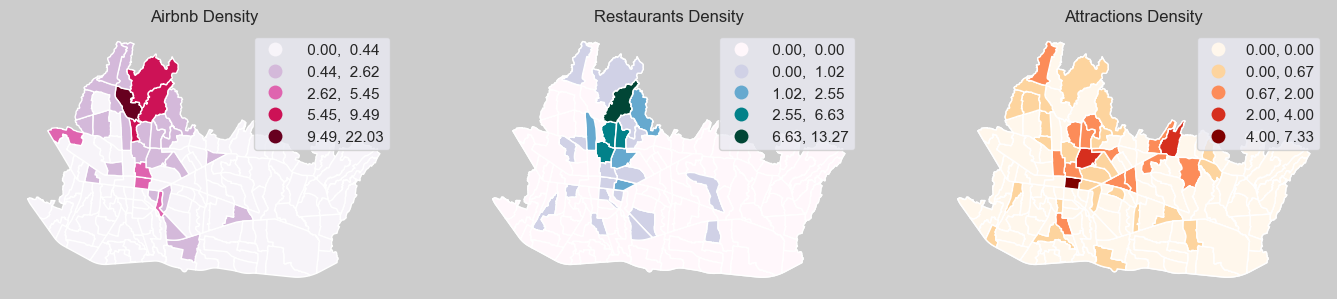

In [92]:
# Bandung
# Set up figure and axis
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17,17))
# Plot Number of Airbnbs
ax1 = airbnbcs_bdg.plot(column='Airbnb_Density', scheme='fisherjenks', legend=True, ax=ax1, cmap='PuRd')
ax2 = airbnb_bdg_all.plot(column='Restaurant_Density', scheme='fisherjenks', legend=True, ax=ax2, cmap='PuBuGn')
ax3 = airbnb_bdg_all.plot(column='Attractions_Density', scheme='fisherjenks', legend=True, ax=ax3, cmap='OrRd')
# Remove axis frame
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
# Change background color of the figure
f.set_facecolor('0.8')
# set up the title
#f.suptitle('Amount of Airbnbs in LSOAs', size=25)
ax1.set_title('Airbnb Density')
ax2.set_title('Restaurants Density')
ax3.set_title('Attractions Density')

Text(0.5, 1.0, 'Parks Density')

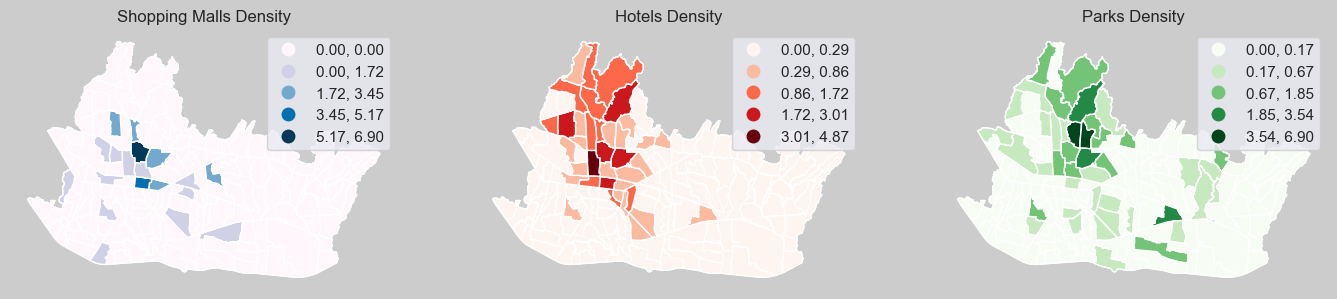

In [99]:
# Set up figure and axis
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17,17))
# Plot Number of Airbnbs
ax1 = airbnb_bdg_all.plot(column='Mall_Density', scheme='fisherjenks', legend=True, ax=ax1, cmap='PuBu')
ax2 = airbnb_bdg_all.plot(column='Hotel_Density', scheme='fisherjenks', legend=True, ax=ax2, cmap='Reds')
ax3 = airbnb_bdg_all.plot(column='Parks_Density', scheme='fisherjenks', legend=True, ax=ax3, cmap='Greens')

# Remove axis frame
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Change background color of the figure
f.set_facecolor('0.8')
# set up the title
#f.suptitle('Amount of Airbnbs in LSOAs', size=25)
ax1.set_title('Shopping Malls Density')
ax2.set_title('Hotels Density')
ax3.set_title('Parks Density')

Text(0.5, 1.0, 'Attractions Density')

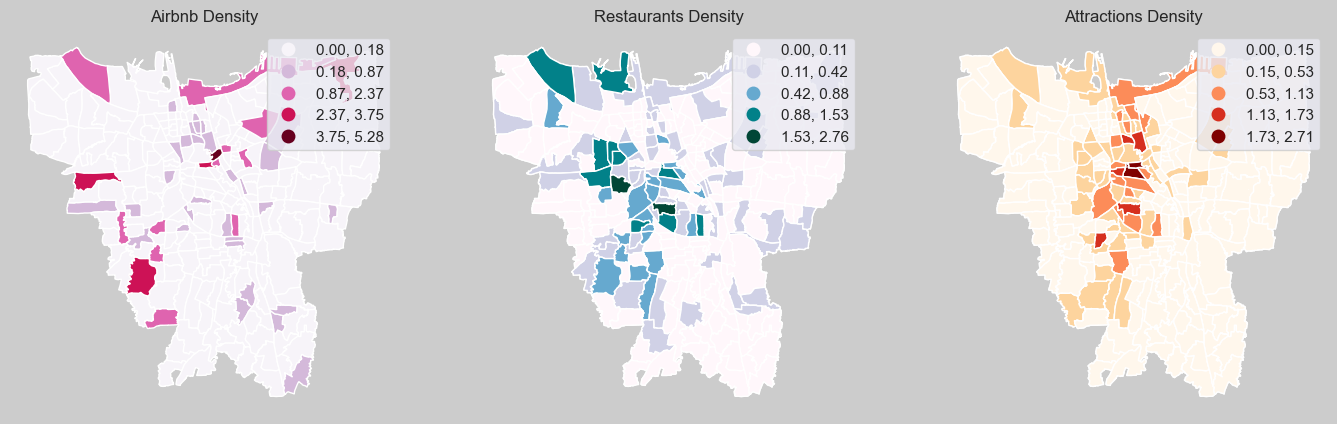

In [97]:
# Jakarta
# Set up figure and axis
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17,17))
# Plot Number of Airbnbs
ax1 = airbnbcs_jkt.plot(column='Airbnb_Density', scheme='fisherjenks', legend=True, ax=ax1, cmap='PuRd')
ax2 = airbnb_jkt_all.plot(column='Restaurant_Density', scheme='fisherjenks', legend=True, ax=ax2, cmap='PuBuGn')
ax3 = airbnb_jkt_all.plot(column='Hotel_Density', scheme='fisherjenks', legend=True, ax=ax3, cmap='OrRd')
# Remove axis frame
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
# Change background color of the figure
f.set_facecolor('0.8')
# set up the title
#f.suptitle('Amount of Airbnbs in LSOAs', size=25)
ax1.set_title('Airbnb Density')
ax2.set_title('Restaurants Density')
ax3.set_title('Attractions Density')

Text(0.5, 1.0, 'Parks Density')

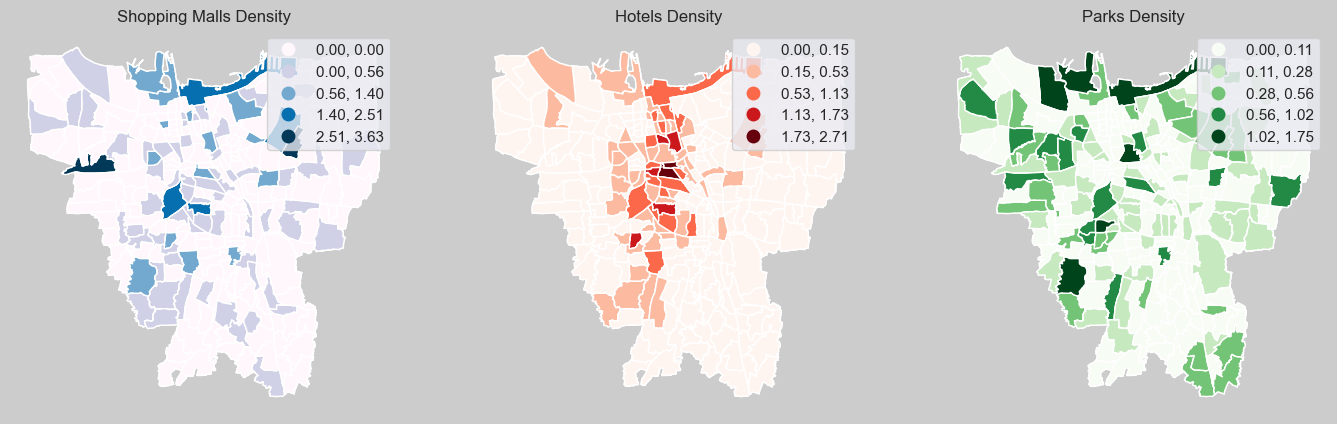

In [98]:
# Set up figure and axis
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17,17))
# Plot Number of Airbnbs
ax1 = airbnb_jkt_all.plot(column='Mall_Density', scheme='fisherjenks', legend=True, ax=ax1, cmap='PuBu')
ax2 = airbnb_jkt_all.plot(column='Hotel_Density', scheme='fisherjenks', legend=True, ax=ax2, cmap='Reds')
ax3 = airbnb_jkt_all.plot(column='Parks_Density', scheme='fisherjenks', legend=True, ax=ax3, cmap='Greens')

# Remove axis frame
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Change background color of the figure
f.set_facecolor('0.8')
# set up the title
#f.suptitle('Amount of Airbnbs in LSOAs', size=25)
ax1.set_title('Shopping Malls Density')
ax2.set_title('Hotels Density')
ax3.set_title('Parks Density')

## References:
https://towardsdatascience.com/data-exploration-on-airbnb-singapore-01-40698c54cac3
https://github.com/Zhitaow/Airbnb-Data-Analysis/blob/master/airbnb.ipynb
